In [1]:
import os
import pandas as pd
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error

from datetime import timedelta
cantonKeys = ['AG','AI','AR', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR', 'JU', 'LU', 'NE', 'NW', 'OW', 'SG', 'SH', 'SO', 'SZ', 'TG', 'TI', 'UR', 'VD', 'VS', 'ZG','ZH']

merged = {}
dailyFeatures = {}
modelFeatures = {}

for cantonId in cantonKeys:
    d = pd.read_csv("data/merged/"+cantonId+".csv")
    d = d.set_index('date')
    merged[cantonId] = d
    
for cantonId in cantonKeys:
    d = pd.read_csv("data/dailyFeatures/"+cantonId+".csv")
    d = d.set_index('date')
    dailyFeatures[cantonId] = d
    
for cantonId in cantonKeys:
    d = pd.read_csv("data/features/"+cantonId+".csv")
    modelFeatures[cantonId] = d
    

def listToStringUnderline(list):
    str1 = "_"
    return (str1.join(list))

def listToStringComma(list):
    str1 = ", "
    return (str1.join(list))



In [ ]:
for cantonId in cantonKeys:
    data = pd.read_csv('data/dailyFeatures/'+cantonId+'.csv')
    for col in data.columns:
        if data[col].isna().sum() != 0:
            display(cantonId)
            print(col+" (#NaN/#NotNaN): (" + str(data[col].isna().sum())+"/"+str(data[col].notna().sum())+")")

In [ ]:
#dailyFeatures['AI'][['testPositvity','case_entries','test_entries']]

In [ ]:
display([col for col in dailyFeatures['AG'].columns])

In [ ]:
# Plot generator to compare one features with multiple cantons 
df = pd.DataFrame(index=dailyFeatures['JU'].index)

#cantonSelection = ['ZH','AG','AI']
cantonSelection = cantonKeys
'''
    'VaccDosesAdministered per100PersonsTotal_7dayAverage':('Total vaccine doses administered','total per 100 people'),
    'FullyVaccPersons per100PersonsTotal_7dayAverage':('Fully vaccinated people','total per 100 people'),
    'variant_perc_7dayAverage':('Percentage of variants of concern','Percentage'),
    'case_inz_entries_7dayAverage':('Case incidence','Cases per 100k people'),
    'case_inzsumTotal':('Total case incidence','Total cases per 100k people'),
   
    'hosp_inzsumTotal':('Total hospitalization incidence','Hospitalizations per 100k people'),
    'death_inz_entries_7dayAverage':('Death incidence','Deaths per 100k people'),
    'death_inzsumTotal':('Total death incidence','Total deaths per 100k people'),
    'test_inz_entries_7dayAverage':('Test incidence','Tests per 100k people'),
    'test_inzsumTotal':('Total test incidence','Total tests per 100k people'),
    'median_R_mean':('Estimated reproductive number R','reproductive number R'),
    'R_error':('R confidence','high-low confidence intervall'),
    'retail_and_recreation_percent_change_from_baseline':('retail & recreation mobility','percent change from baseline'),
    'grocery_and_pharmacy_percent_change_from_baseline':('grocery & pharmacy mobility','percent change from baseline'),
    'parks_percent_change_from_baseline':('park mobility','percent change from baseline'),
    'transit_stations_percent_change_from_baseline':('transit station mobility','percent change from baseline'),
    'workplaces_percent_change_from_baseline':('workplace mobility','percent change from baseline'),
    'residential_percent_change_from_baseline':('residential mobility','percent change from baseline'),
    'kofStrigency':('KOF strigency plus index','strigency values'), 
    'Borders':('Borders','Strigency state'),
    'Events':('Events','Strigency state'),
    'Gatherings/private events':('Gatherings/private events','Strigency state'),
    'Demonstrations':('Demonstrations','Strigency state'),
    'Primary (includes kindergarten) and lower secondary school':('Primary (includes kindergarten) and lower secondary school','Strigency state'),
    'Upper secondary school, vocational schools and higher education':('Upper secondary school, vocational schools and higher education','Strigency state'),
    'Universities and other educational establishments':('Universities and other educational establishments','Strigency state'),
    'Mountain railways':('Mountain railways','Strigency state'),
    'Homeworking':('Homeworking','Strigency state'),
    'Restaurants':('Restaurants','Strigency state'),
    'Discos/Nightclubs':('Discos/Nightclubs','Strigency state'),
    'Shops/Markets':('Shops/Markets','Strigency state'),
    'Penalties':('Penalties','Strigency state'),
    'Cultural, entertainment and recreational facilities':('Cultural, entertainment and recreational facilities','Strigency state'),
    'Sport/Wellness facilities':('Sport/Wellness facilities','Strigency state'),
    'Sport activities':('Sport activities','Strigency state'),
    'Religious services':('Religious services','Strigency state'),
    'Singing allowed':('Singing','Strigency state'),
    'maskMandatories':('Masks','Strigency state'),
    'isHoliday':('School vacations and Holidays', 'isHoliday'),
    'intervistaMob':('Intervista mobility', 'Median distance per person'),   
    'meanNeighborIncidence':('Mean neighbor incidence', 'Mean of neighbor 14-day incidence'),
    'maxNeighborIncidence':('Maximum neighbor incidence', 'Maximum of neighbor 14-day incidence'),
    'temp_min':('Minimum temperature','Kelvin'),
    'temp_max':('Maximum temperature','Kelvin'),
    'clouds':('Cloud level','cloudiness in percentage'),
    'precipitation':('Precipitation','l/m^2'),
    'testPositvity_7dayAverage':('Test positivity 7 day average','percentage'),
    'testPositvity':('Test positivity','percentage'),
    'ICU_AllPatients_inz':('All ICU patients','per 100k people'),
    'ICU_FreeCapacity_inz':('Free ICU capacity','Free ICU capacity per 100k people'),
    'ICU_Capacity_inz':('Total ICU Capacity','Total ICU Capacity per 100k people'),
    'ICU_Covid19Patients_inz':('Covid 19 ICU patients','Covid 19 ICU patients per 100k people'),
    'ICU_NonCovid19Patients_inz':('Non Covid ICU patients','Non Covid ICU patients per 100k people'),
    'Total_AllPatients_inz':('Total patients','Total patients per 100k people'),
    'Total_Covid19Patients_inz':('Total Covid 10 patients','Total Covid 10 patients per 100k people'),
    'Total_Capacity_inz':('Total hospital capacity','Total hospital capacity per 100k people'),
    'Total_NonCovid19Patients_inz':('Total non Covid patients','Total non Covid patients per 100k people'),
    'Total_FreeCapacity_inz':('Total free capacity','Total free capacity per 100k people'),
        'test_entries':('Test entries', 'number of tests'),
    'test_inz_entries_7dayAverage':('Test incidence 7 day average','Tests per 100k people'),
    'testPositvity_7dayAverage':('Test positivity 7 day average','percentage'),
    
'''

featureTitles = { #(Title, y-axis)
    'case_entries':('Cases','Number of cases'),
    'test_entries':('Tests','Number of tests'),
    'testPositvity_7dayAverageSeperate':('Test positivity','percentage'),
    'testPositvity_7dayAverageBoth':('Test positivity','percentage'),
    'testPositvity_7dayAverageSeperateResult':('Test positivity','percentage'),
    'testPositvity':('Test positivity','percentage'),
    'case_inz_entries_7dayAverage':('Case Incidence','incidence value'),
    'hosp_inz_entries_7dayAverage':('Hospitalization incidence','Hospitalizations per 100k people'),
}

for cantonId in cantonKeys:
    for f in featureTitles:
        df[f,cantonId] = dailyFeatures[cantonId][[f]]

listOfPics = []
for f in featureTitles:
    #plot all cantons
    #df[[(f,cantonId) for cantonId in cantonKeys]].plot(kind='line', title=featureTitles[f][0], ylabel=featureTitles[f][1],figsize=(20,10))
    #plt.savefig('plots/'+f.replace('/','').replace(' ','')+'_allCantons.png')
    
    #plot canton selection
    df[[(f,cantonId) for cantonId in cantonSelection]].plot(kind='line', title=featureTitles[f][0]+" "+listToStringComma(cantonSelection), ylabel=featureTitles[f][1],figsize=(20,10))
    plt.show()
    plt.savefig('plots/'+f.replace('/','').replace(' ','')+'_'+listToStringUnderline(cantonSelection)+'.png')
    listOfPics.append(f.replace('/','').replace(' ','')+'_'+listToStringUnderline(cantonSelection)+'.png')
display([e for e in listOfPics])

In [ ]:
# plot generator to compare multiple features in one canton
df = pd.DataFrame(index=dailyFeatures['AG'].index)
cantonSelection = 'AG'
featureLists = { #(Title, ylabel)
    'Cases incidence per age group':(['Cases inz_entries 0 - 19',
                            'Cases inz_entries 20 - 39','Cases inz_entries 40 - 59','Cases inz_entries 60+'],"Cases per 100k people"),
    'Total case incidence per age group':(['Cases inzsumTotal 0 - 19','Cases inzsumTotal 20 - 39',
                                           'Cases inzsumTotal 40 - 59','Cases inzsumTotal 60+'],"Total cases per 100k people"),
    'Death incidence per age group':(['Death inz_entries 0 - 19',
                                     'Death inz_entries 20 - 39',
                                     'Death inz_entries 40 - 59',
                                     'Death inz_entries 60+'],"Deaths per 100k people"),
    'Total death incidence per age group':(['Death inzsumTotal 0 - 19',  
                                         'Death inzsumTotal 20 - 39',          
                                         'Death inzsumTotal 40 - 59',
                                         'Death inzsumTotal 60+'],"Total deaths per 100k people"),
    'Hospital incidence per age group':([ 'Hosp inz_entries 0 - 19', 
                                         'Hosp inz_entries 20 - 39',
                                         'Hosp inz_entries 40 - 59',
                                         'Hosp inz_entries 60+'],"Hospitalizations per 100k people"),
    'Total hospital incidence per age group':(['Hosp inzsumTotal 0 - 19',
                                             'Hosp inzsumTotal 20 - 39',
                                             'Hosp inzsumTotal 40 - 59',
                                             'Hosp inzsumTotal 60+'],"Total hospitalizations per 100k people"),
    'Cases by gender':(['Cases inz_entries female',
                         'Cases inz_entries male'],"Cases per 100k people"),
    'Total cases by gender':(['Cases inzsumTotal female',
                             'Cases inzsumTotal male'],"Total cases per 100k people"),
    'Deaths by gender':(['Death inz_entries female',
                         'Death inz_entries male'],"Deaths per 100k people"),
    'Total deaths by gender':([ 'Death inzsumTotal female',
                                 'Death inzsumTotal male'],"Total deaths per 100k people"),
    'Hospitalizations by gender':([ 'Hosp inz_entries female',
                                     'Hosp inz_entries male'],"Hospitalizations per 100k people"),
    'Total hospitalizations by gender':([ 'Hosp inzsumTotal female',
                                         'Hosp inzsumTotal male'],"Total hospitalizations per 100k people")
}



for featureKey in featureLists:
    dailyFeatures[cantonSelection][featureLists[featureKey][0]].plot(kind='line', title=featureKey, figsize=(20,10), ylabel=featureLists[featureKey][1])
    plt.show()
    plt.savefig('plots/feature_comparison_'+featureKey.replace('/','').replace(' ','')+'_'+cantonSelection+'.png')



In [ ]:
# one feature all cantons
'test_inz_entries_7dayAverage'

In [ ]:
#df.plot(kind='scatter', x='x', y='y', label='Scatter')

'''
for cantonId in cantonKeys:
    y = 'maxNeighborIncidence'
    scondary_y = 'case_inz_entries'
    #df[[(y,cantonId),(scondary_y,cantonId)]].plot(kind='line', title="Maximum neighbor incidence vs. actual cantonal incidence",figsize=(20,10), y=[(y,cantonId),(scondary_y,cantonId)], secondary_y=[(scondary_y,cantonId)], sharey=False)  

df2=pd.DataFrame(index=df.index)
#display(pd.DataFrame(df[[('maxNeighborIncidence',cantonId) for cantonId in cantonKeys]].mean(axis=1)))
df2[['maxNeighborIncidenceSwissMean']] = pd.DataFrame(df[[('maxNeighborIncidence',cantonId) for cantonId in cantonKeys]].mean(axis=1))
df2[['meanNeighborIncidenceSwissMean']] = pd.DataFrame(df[[('meanNeighborIncidence',cantonId) for cantonId in cantonKeys]].mean(axis=1))
df2[['case_inz_entriesSwissMean']] = pd.DataFrame(df[[('case_inz_entries',cantonId) for cantonId in cantonKeys]].mean(axis=1))
#display(df2)
y = 'meanNeighborIncidenceSwissMean'
scondary_y = 'case_inz_entriesSwissMean'
df2[[y,scondary_y]].plot(kind='line', title="",figsize=(20,10), y=[y, scondary_y], secondary_y=scondary_y, sharey=False)
'''
#display(pd.DataFrame(df[[('maxNeighborIncidence',cantonId) for cantonId in cantonKeys]].sum(), columns=['SumMaxIncidence']).sort_values(by='SumMaxIncidence'))
#display(pd.DataFrame(df[[('meanNeighborIncidence',cantonId) for cantonId in cantonKeys]].sum(), columns=['SumMeanIncidence']).sort_values(by='SumMeanIncidence'))


'''
from scipy.ndimage.interpolation import shift
copy = dict['AG'].copy()

dict['AG']['case_entries_shifted'] = np.roll(np.array(copy['case_entries']), 14)


corr_matrix = dict['AG'].corr()
display(corr_matrix['case_entries_shifted'].sort_values(ascending=False))
'''

In [2]:
pd.options.display.max_rows = 10

data = pd.read_csv("completedata.csv")

outputCategories = [
                  'case_inz_entries_7dayAverage',
                  'hosp_inz_entries_7dayAverage',
                  'death_inz_entries_7dayAverage',
                  'testPositvity',
                  'testPositvity_7dayAverageBoth',    
                  'transit_stations_percent_change_from_baseline_7dayAverage',
                  'workplaces_percent_change_from_baseline_7dayAverage',    
                   ]
numberOfOutputs = len(outputCategories)
numberOfInputWeeks = 3
numberOfOutputWeeks = 4

numberOfPreComputedOutputWeeks = 4

split = numberOfOutputs * numberOfPreComputedOutputWeeks + 2
train_features = data[data['category']=='train'].iloc[:,0:-split].drop(['lastInputDay'], axis=1)
train_labels = data[data['category']=='train'].iloc[:,-split:-2]
validation1_features = data[data['category']=='validation 1'].iloc[:,0:-split].drop(['lastInputDay'], axis=1)
validation1_labels = data[data['category']=='validation 1'].iloc[:,-split:-2]
validation2_features = data[data['category']=='validation 2'].iloc[:,0:-split].drop(['lastInputDay'], axis=1)
validation2_labels = data[data['category']=='validation 2'].iloc[:,-split:-2]


results = pd.read_csv("results_week1_0.csv")
results = results.append(pd.read_csv("results_week2_0.csv"), ignore_index=True)
results = results.append(pd.read_csv("results_week2_1.csv"), ignore_index=True)
results = results.append(pd.read_csv("results_week3_0.csv"), ignore_index=True)
results = results.append(pd.read_csv("results_week4_0.csv"), ignore_index=True)
results = results.append(pd.read_csv("results_keras_0.csv"), ignore_index=True)
results = results.append(pd.read_csv("results_multi_week.csv"), ignore_index=True)
temp1 = pd.read_csv("results_keras_multi_week_1.csv")
temp1.columns = results.columns
results = results.append(temp1, ignore_index=True)
temp1 = pd.read_csv("results_keras_multi_week_2.csv")
temp1.columns = results.columns
results = results.append(temp1, ignore_index=True)
temp1 = pd.read_csv("results_keras_multi_week_3.csv")
temp1.columns = results.columns
results = results.append(temp1, ignore_index=True)
temp1 = pd.read_csv("results_keras_multi_week_4.csv")
temp1.columns = results.columns
results = results.append(temp1, ignore_index=True)
temp1 = pd.read_csv("results_keras_multi_week_5.csv")
temp1.columns = results.columns
results = results.append(temp1, ignore_index=True)







for predictionWeek in range(0,numberOfOutputWeeks):
    for category in outputCategories:
        # last value of last input week
        last_value_baseline_rmse1 = np.sqrt(mean_squared_error(validation1_features[category+"_last_"+str(numberOfInputWeeks-1)],
                                                               validation1_labels["output_"+category+"_"+str(predictionWeek)]))
        last_value_baseline_rmse2 = np.sqrt(mean_squared_error(validation2_features[category+"_last_"+str(numberOfInputWeeks-1)],
                                                               validation2_labels["output_"+category+"_"+str(predictionWeek)]))
        
        estimatorRows = results[(results['week']==predictionWeek) & (results['target']==category)]

        results.loc[estimatorRows.index, 'last value baseline rsme 1'] = last_value_baseline_rmse1
        results.loc[estimatorRows.index, 'last value baseline rsme 2'] = last_value_baseline_rmse2

results['rel. diff. to last value baseline 1'] = (results['last value baseline rsme 1']-results['model rsme 1'])/results['last value baseline rsme 1']
results['rel. diff. to last value baseline 2'] = (results['last value baseline rsme 2']-results['model rsme 2'])/results['last value baseline rsme 2']

results = results.sort_values(['rel. diff. to last value baseline 1'], ascending=False)

'''
for category in outputCategories:
    #display("prediction week: " + str(predictionWeek))
    for predictionWeek in range(0,numberOfOutputWeeks):
        #display("prediction target: " + category)
        display(results[(results['week']==predictionWeek) & (results['target']==category)].head(10))
'''    
    
      
temp1

model  \
0      lr=0.0001_hl=[400, 200, 100, 90, 80, 70, 60, 5...   
1      lr=0.001_hl=[150]_do=0.3_l1=10_l2=0.1_tw=False...   
2      lr=0.001_hl=[300]_do=0.3_l1=10_l2=10_tw=False_...   
3      lr=0.001_hl=[300]_do=0_l1=10_l2=0.001_tw=False...   
4      lr=0.001_hl=[150]_do=0.5_l1=10_l2=0.001_tw=Fal...   
...                                                  ...   
55833  lr=0.0001_hl=[100]_do=0.3_l1=0.01_l2=0_tw=True...   
55834  lr=0.0001_hl=[100]_do=0.3_l1=0.001_l2=0.001_tw...   
55835  lr=0.0001_hl=[100]_do=0.3_l1=0.001_l2=1_tw=Tru...   
55836  lr=0.001_hl=[100]_do=0.3_l1=0.1_l2=10_tw=True_...   
55837  lr=0.0001_hl=[100]_do=0_l1=0.01_l2=0.01_tw=Tru...   

                     model type                         target  week  \
0      keras_multi_weeks_output   case_inz_entries_7dayAverage     1   
1      keras_multi_weeks_output   case_inz_entries_7dayAverage     1   
2      keras_multi_weeks_output   case_inz_entries_7dayAverage     1   
3      keras_multi_weeks_output   case_inz_entries_7dayAverage     1   
4      keras_multi_weeks_output   case_inz_entries_7dayAverage     1   
...                         ...                            ...   ...   
55833  keras_multi_weeks_output  testPositvity_7dayAverageBoth     0   
55834  keras_multi_weeks_output  testPositvity_7dayAverageBoth     0   
55835  keras_multi_weeks_output  testPositvity_7dayAverageBoth     0   
55836  keras_multi_weeks_output  testPositvity_7dayAverageBoth     0   
55837  keras_multi_weeks_output  testPositvity_7dayAverageBoth     0   

       model rsme 1  model rsme 2  
0          6.051517     39.858253  
1          6.034559     39.857569  
2          6.026297     39.852072  
3          6.042963     39.845721  
4          6.032561     39.845714  
...             ...           ...  
55833      0.037753      0.015811  
55834      0.034773      0.015775  
55835      0.024418      0.015667  
55836      0.024192      0.015598  
55837      0.050604      0.015013  

[55838 rows x 6 columns]

In [3]:
df = results.copy()
df.loc[df['model'].str.contains('Lasso'), 'model class'] = 'Lasso'
df.loc[df['model'].str.contains('MultiTaskLasso'), 'model class'] = 'MultiTaskLasso'
df.loc[df['model'].str.contains('Ridge'), 'model class'] = 'Ridge'
df.loc[df['model'].str.contains('SGDRegressor'), 'model class'] = 'SGD'
df.loc[df['model'].str.contains('KernelRidge'), 'model class'] = 'KernelRidge'
df.loc[df['model'].str.contains('MLPRegressor'), 'model class'] = 'MLP'
df.loc[df['model'].str.contains('LGBMRegressor'), 'model class'] = 'LGBM' 
df.loc[df['model'].str.contains('XGBRegressor'), 'model class'] = 'XGB' 
df.loc[df['model'].str.contains('SVR'), 'model class'] = 'SVR' 
df.loc[df['model'].str.contains('RandomForestRegressor'), 'model class'] = 'RandomForest' 
df.loc[df['model'].str.contains('_learningrate_'), 'model class'] = 'Keras'
df.loc[df['model'].str.contains('_do='), 'model class'] = 'Keras'

df.loc[df['model type'].str.contains('single_output'), 'single or multi output'] = 'single'
df.loc[df['model type'].str.contains('multi_output'), 'single or multi output'] = 'multi'
df.loc[df['model type'].str.contains('multi_weeks_output'), 'single or multi output'] = 'multi week'

#df = df[df['model class'] == 'Keras']
df


model  \
78      Lasso(alpha=0.001, copy_X=True, fit_intercept=...   
2045    Lasso(alpha=0.001, copy_X=True, fit_intercept=...   
16929   Lasso(alpha=0.001, copy_X=True, fit_intercept=...   
772     LGBMRegressor(boosting_type='gbdt', class_weig...   
807     XGBRegressor(base_score=0.5, booster='gbtree',...   
...                                                   ...   
157281  lr=0.001_hl=[50]_do=0_l1=0.1_l2=1_tw=False_mo=...   
12547   twowaycomplexdropout_learningrate_1e-05_batchs...   
212367  lr=0.001_hl=[150]_do=0_l1=0.0001_l2=10_tw=Fals...   
1796    twowaycomplexdropout_learningrate_1e-05_batchs...   
211905  lr=0.001_hl=[150]_do=0_l1=0.0001_l2=10_tw=Fals...   

                        model type                         target  week  \
78           sklearn_single_output   hosp_inz_entries_7dayAverage     0   
2045          sklearn_multi_output   hosp_inz_entries_7dayAverage     0   
16929   sklearn_multi_weeks_output   hosp_inz_entries_7dayAverage     0   
772          sklearn_single_output  death_inz_entries_7dayAverage     0   
807          sklearn_single_output  death_inz_entries_7dayAverage     0   
...                            ...                            ...   ...   
157281    keras_multi_weeks_output  testPositvity_7dayAverageBoth     0   
12547           keras_multi_output  testPositvity_7dayAverageBoth     0   
212367    keras_multi_weeks_output  testPositvity_7dayAverageBoth     1   
1796            keras_multi_output  testPositvity_7dayAverageBoth     0   
211905    keras_multi_weeks_output  testPositvity_7dayAverageBoth     0   

        model rsme 1  model rsme 2  last value baseline rsme 1  \
78          0.155770      0.264319                    0.374793   
2045        0.155770      0.264319                    0.374793   
16929       0.155770      0.264319                    0.374793   
772         0.071333      0.134511                    0.157100   
807         0.072128      0.145374                    0.157100   
...              ...           ...                         ...   
157281      0.849624      0.616627                    0.009519   
12547       1.055042      0.730383                    0.009519   
212367      1.478231      0.993865                    0.012699   
1796        1.421382      0.403311                    0.009519   
211905      1.564791      1.075028                    0.009519   

        last value baseline rsme 2  rel. diff. to last value baseline 1  \
78                        0.595523                             0.584385   
2045                      0.595523                             0.584385   
16929                     0.595523                             0.584385   
772                       0.287626                             0.545937   
807                       0.287626                             0.540874   
...                            ...                                  ...   
157281                    0.035338                           -88.255676   
12547                     0.035338                          -109.835463   
212367                    0.049975                          -115.403481   
1796                      0.035338                          -148.320670   
211905                    0.035338                          -163.386255   

        rel. diff. to last value baseline 2 model class single or multi output  
78                                 0.556157       Lasso                 single  
2045                               0.556157       Lasso                  multi  
16929                              0.556157       Lasso             multi week  
772                                0.532341        LGBM                 single  
807                                0.494572         XGB                 single  
...                                     ...         ...                    ...  
157281                           -16.449387       Keras             multi week  
12547                            -19.668468       Keras                  mul

<AxesSubplot:title={'center':'validation set 2 scores'}, xlabel='week', ylabel='rel. diff. to baseline'>

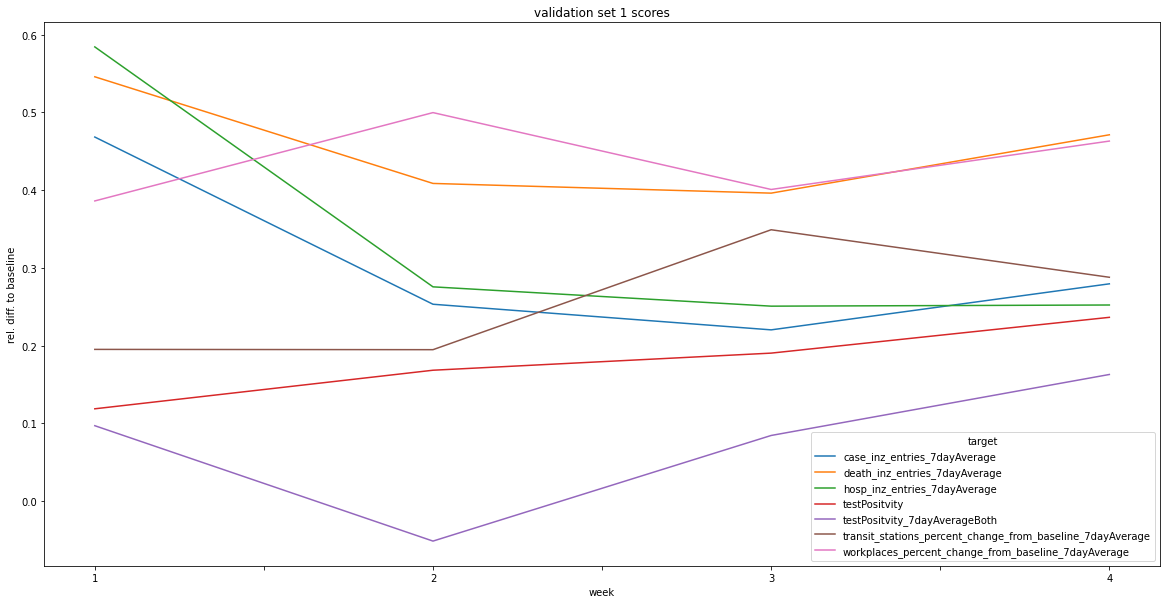

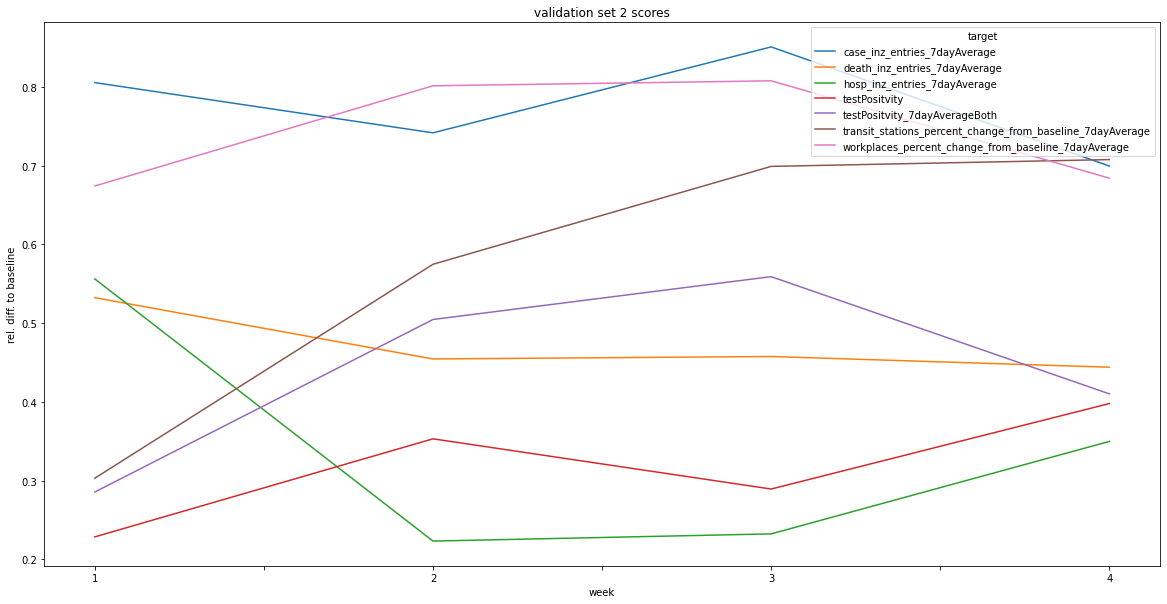

In [50]:
# OVERVIEW (for all weeks best estimator per target)
merged1 = pd.DataFrame()
merged2 = pd.DataFrame()
for week in range(0,numberOfOutputWeeks):
    temp = df[df['week']==week].groupby(['target']).apply(lambda x: x.sort_values(["rel. diff. to last value baseline 1"], ascending=False)).reset_index(drop=True)
    temp = temp.groupby(['target']).head(1)
    temp1 = temp[['target','rel. diff. to last value baseline 1']].set_index('target')
    temp2 = temp[['target','rel. diff. to last value baseline 2']].set_index('target')
    temp1.rename(columns = {'rel. diff. to last value baseline 1': str(week+1)}, inplace = True)
    temp2.rename(columns = {'rel. diff. to last value baseline 2': str(week+1)}, inplace = True)
    merged1 = merged1.append(temp1.transpose())
    merged2 = merged2.append(temp2.transpose())
    #.sort_values(['rsme'], ascending=False)
    #temp.plot(kind='bar', title="week_"+str(week))
    #plt.show()
    
merged1.plot(kind='line', title="validation set 1 scores", ylabel='rel. diff. to baseline', xlabel="week", figsize=(20,10))
merged2.plot(kind='line', title="validation set 2 scores", ylabel='rel. diff. to baseline', xlabel="week", figsize=(20,10))
    

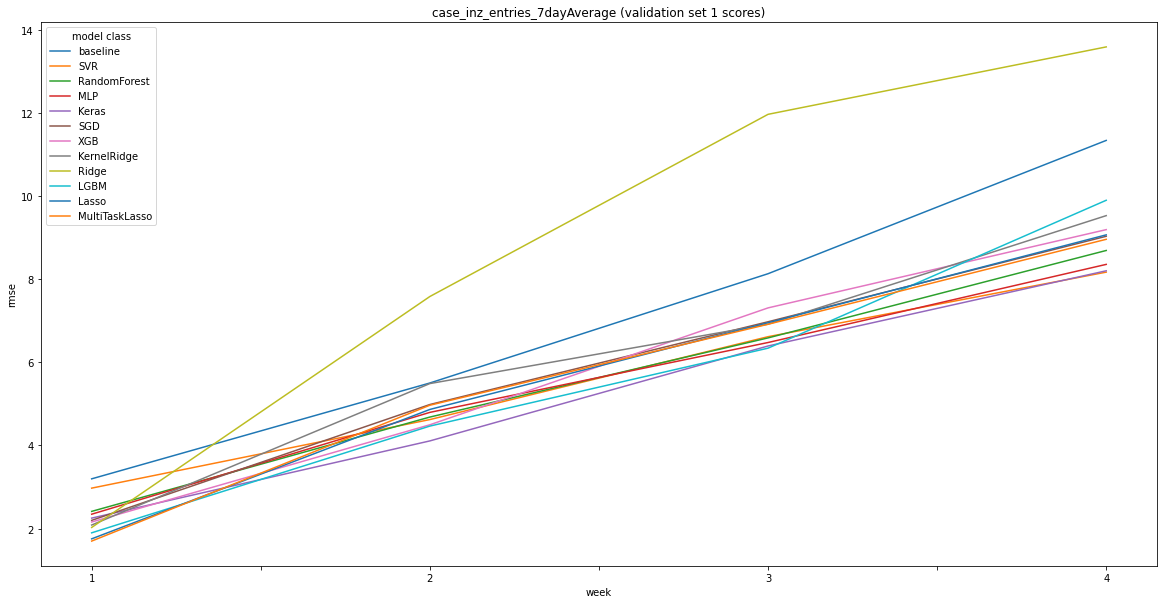

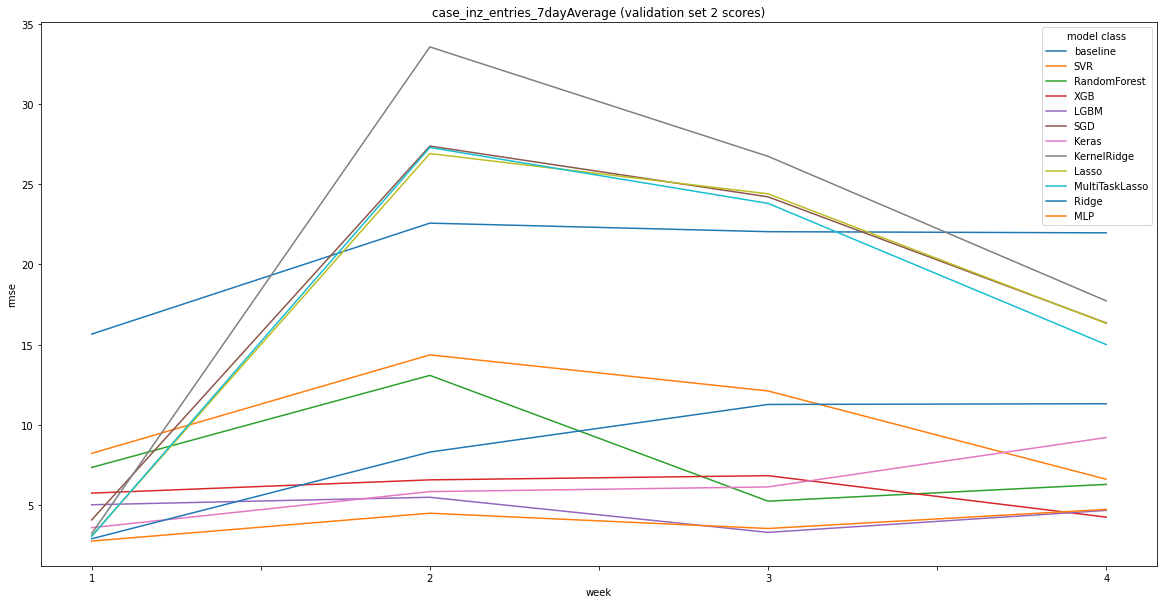

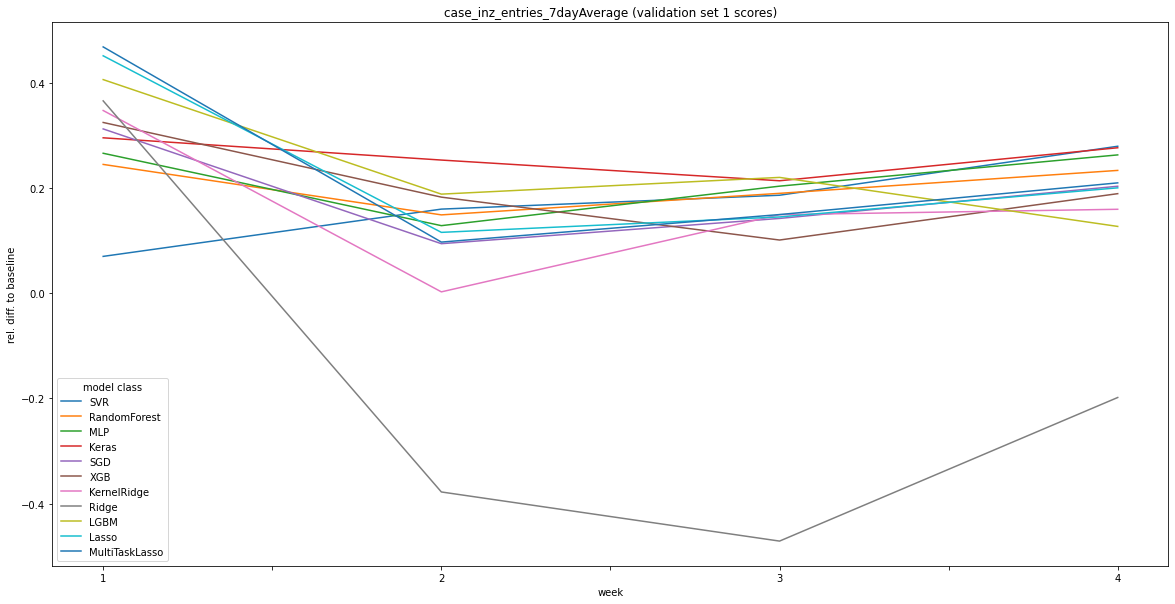

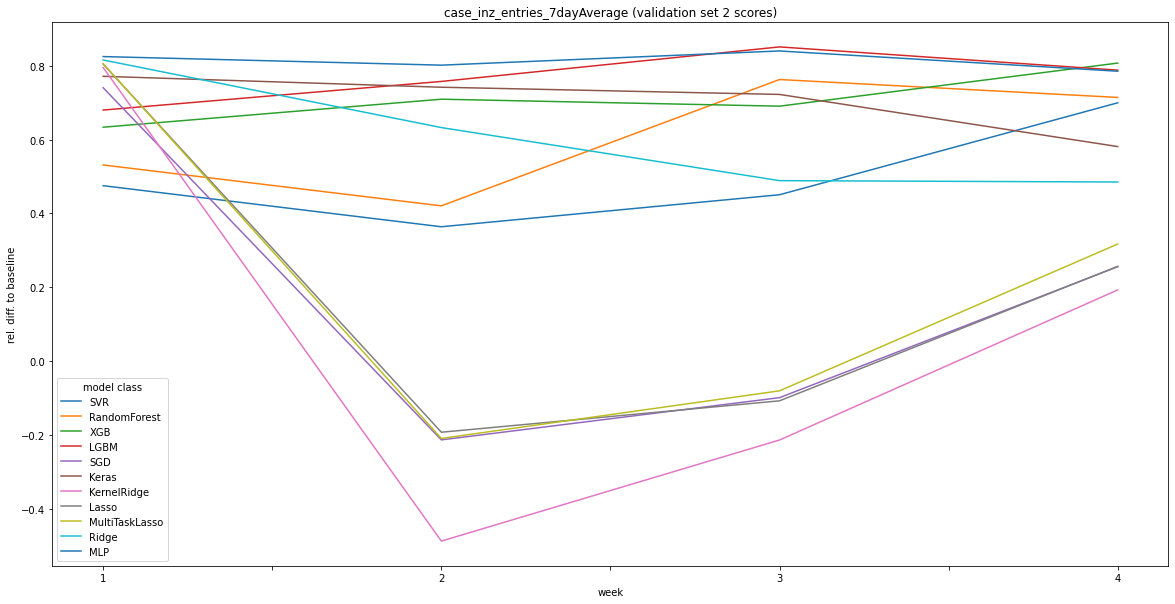

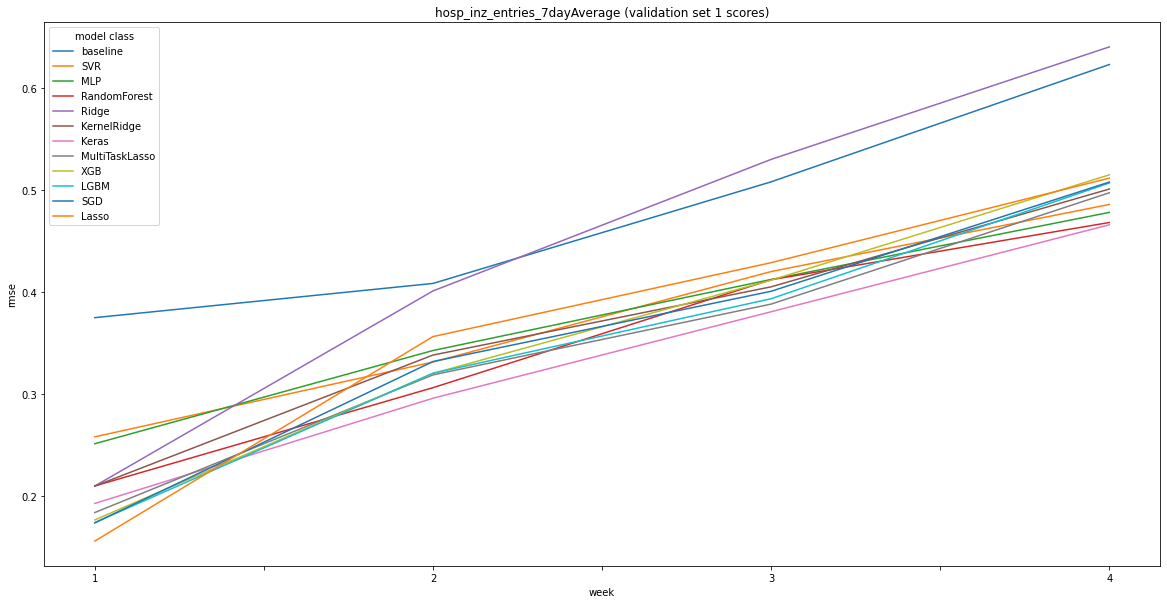

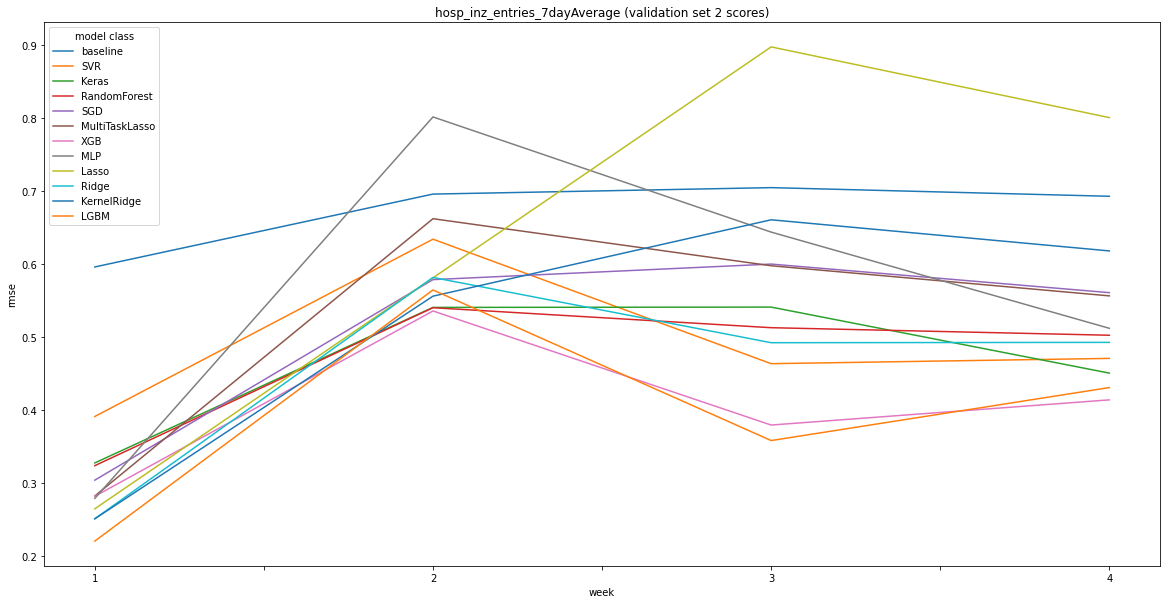

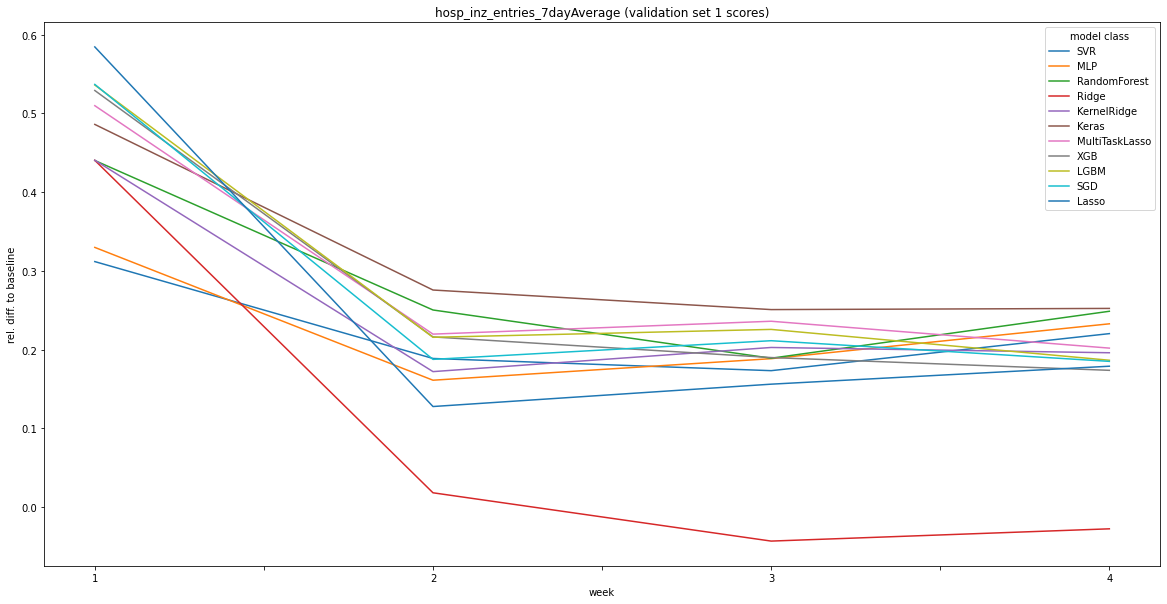

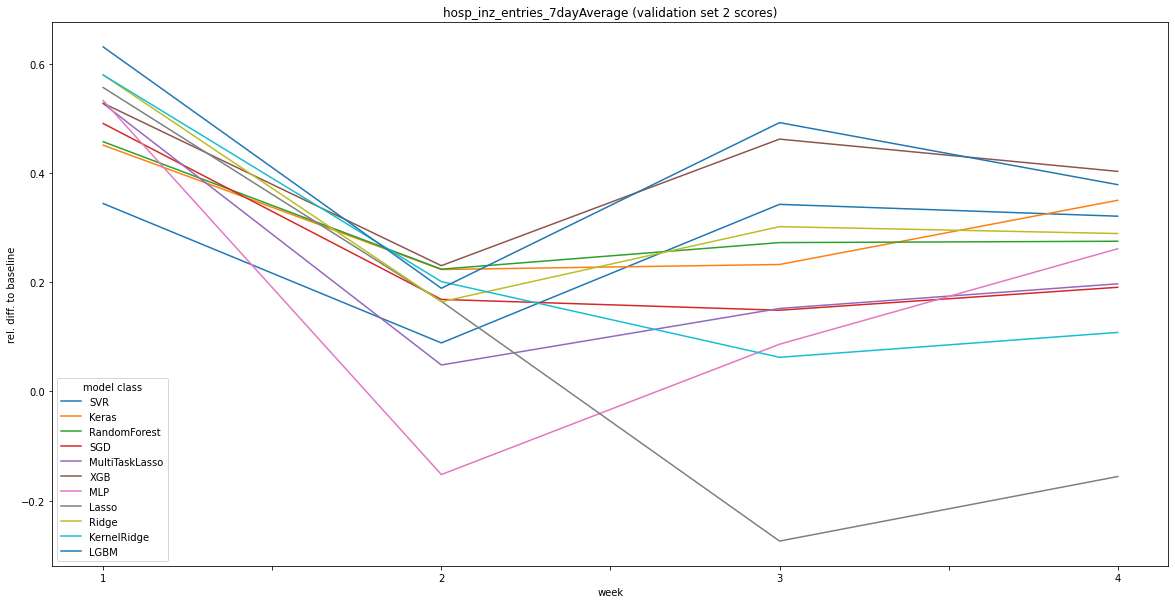

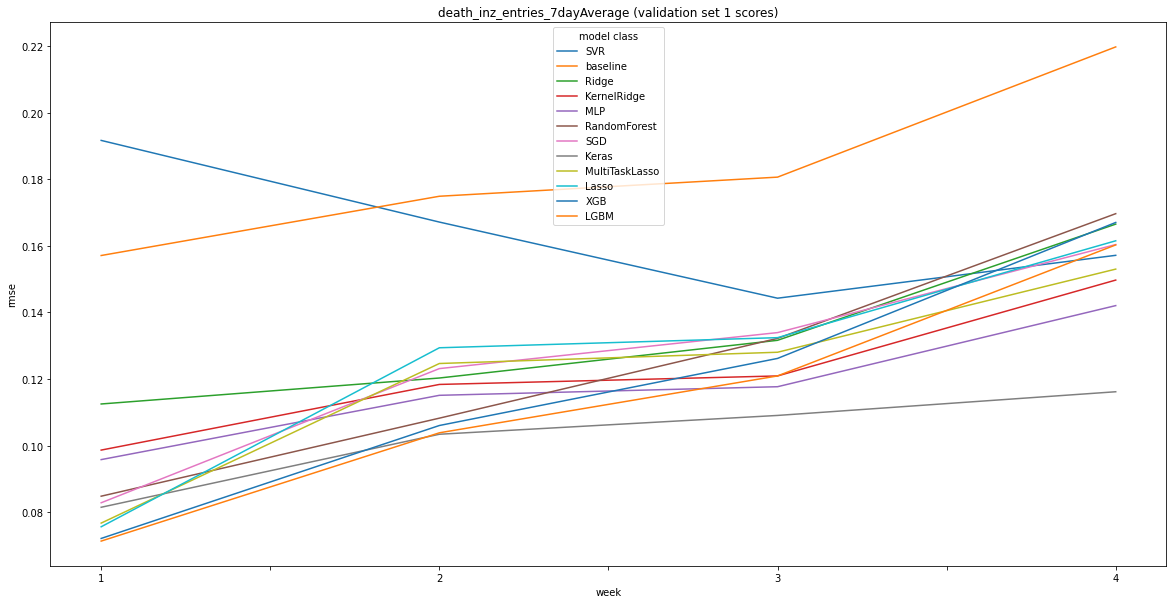

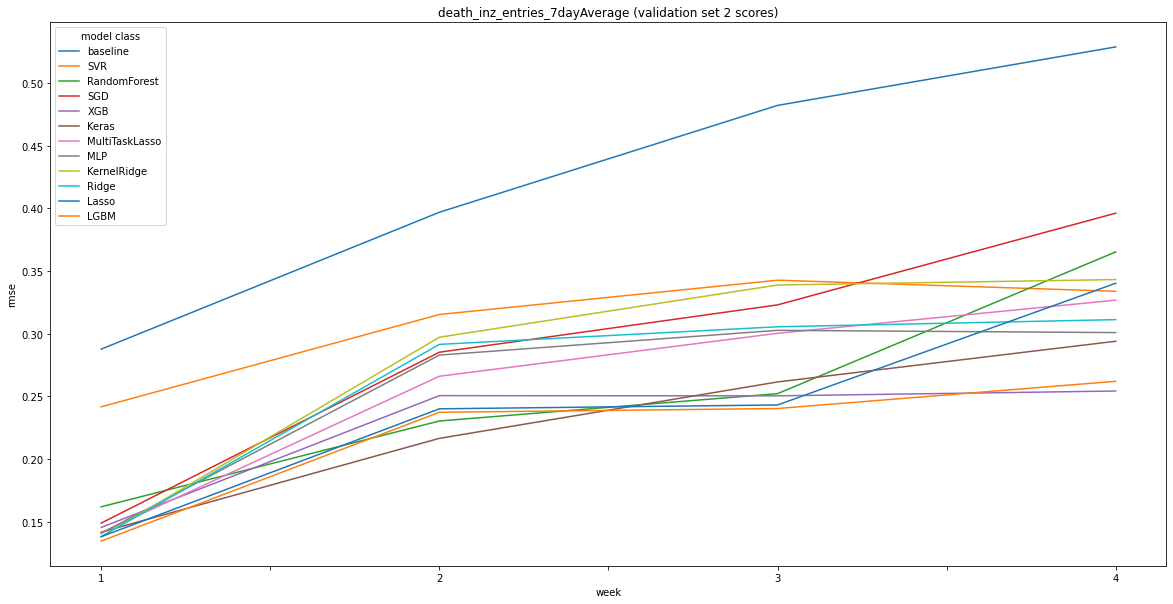

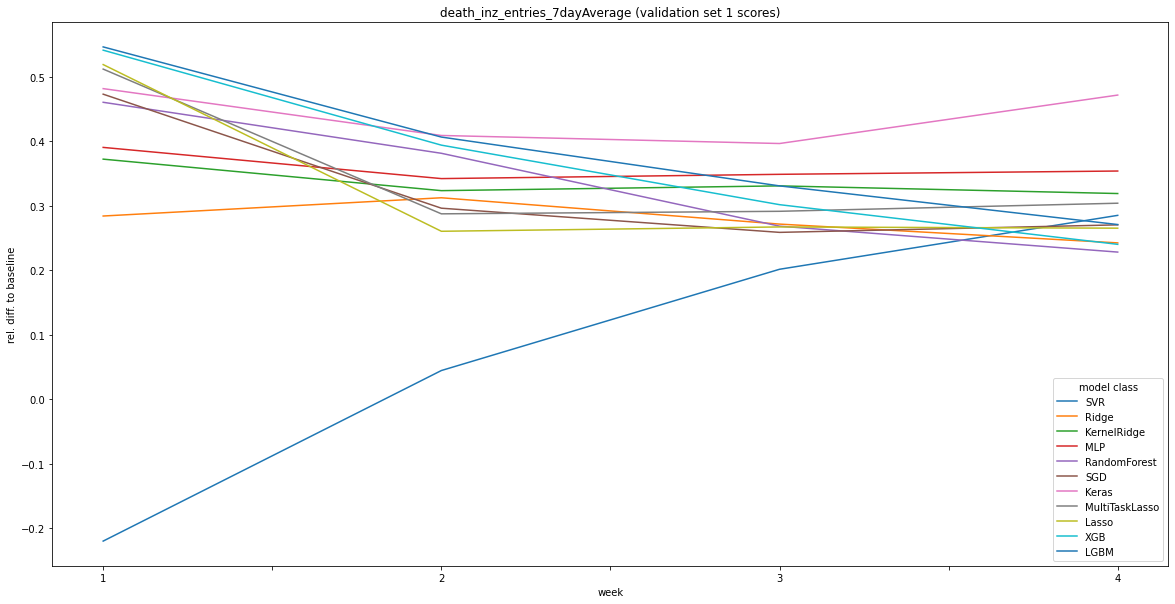

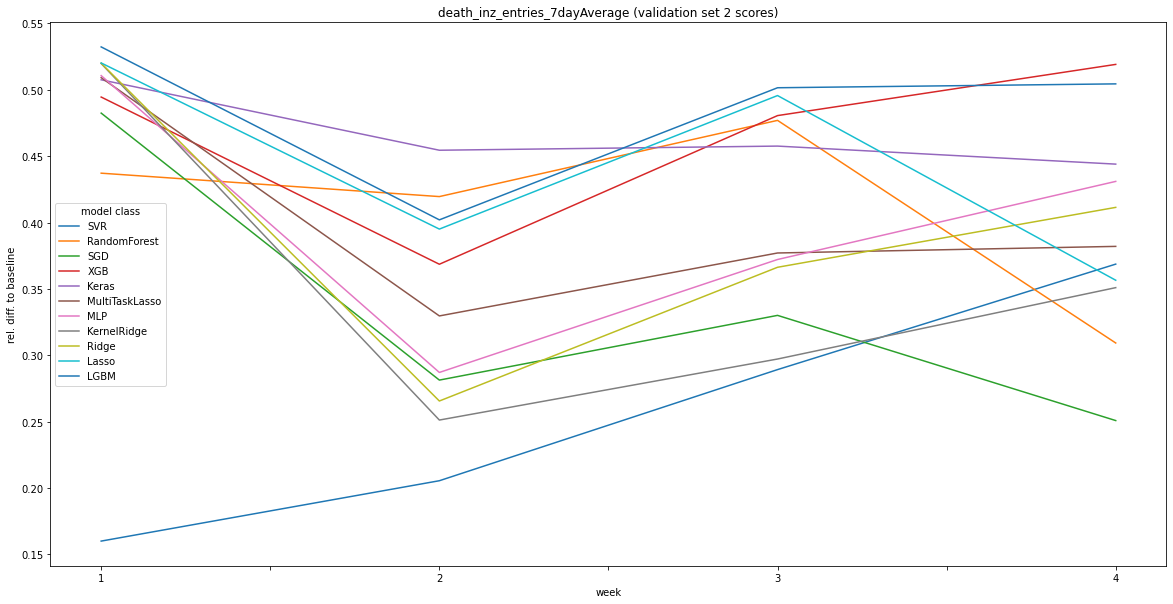

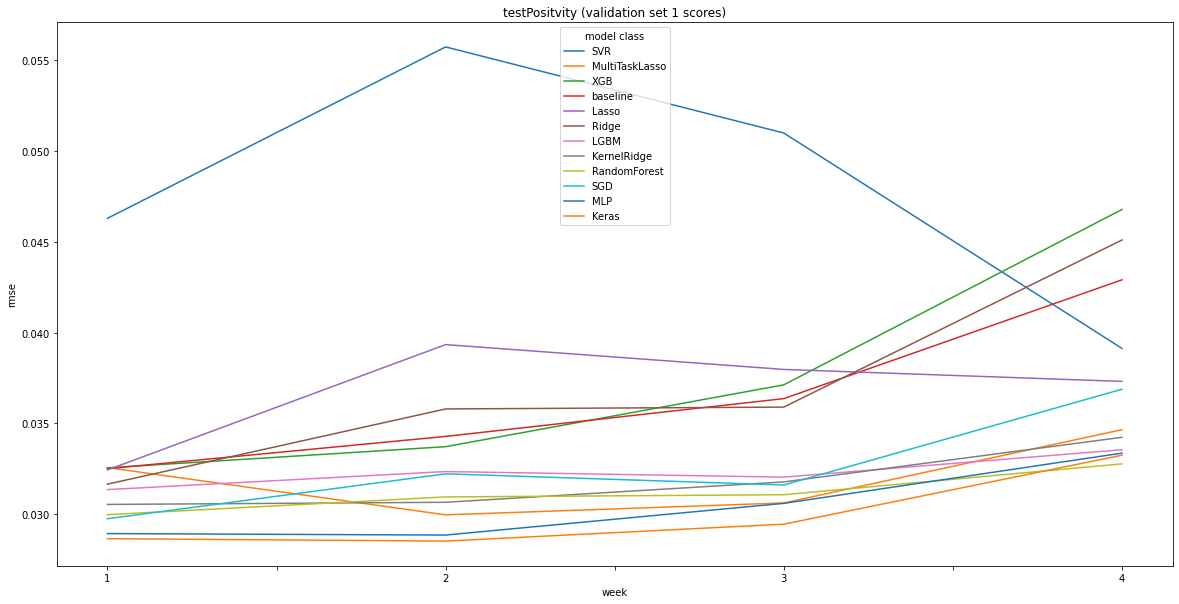

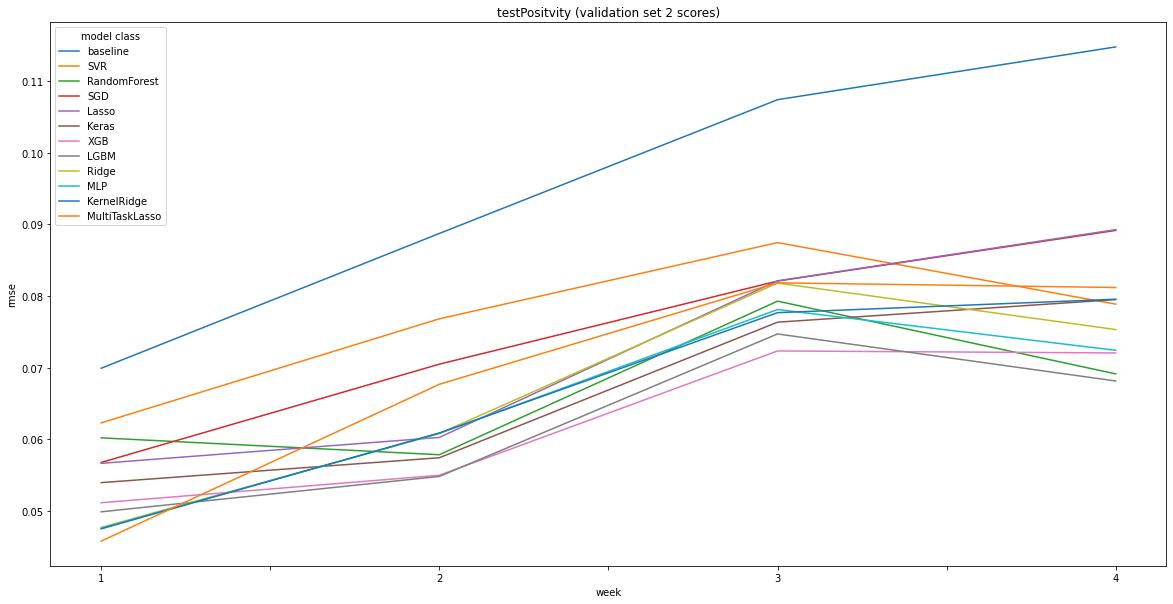

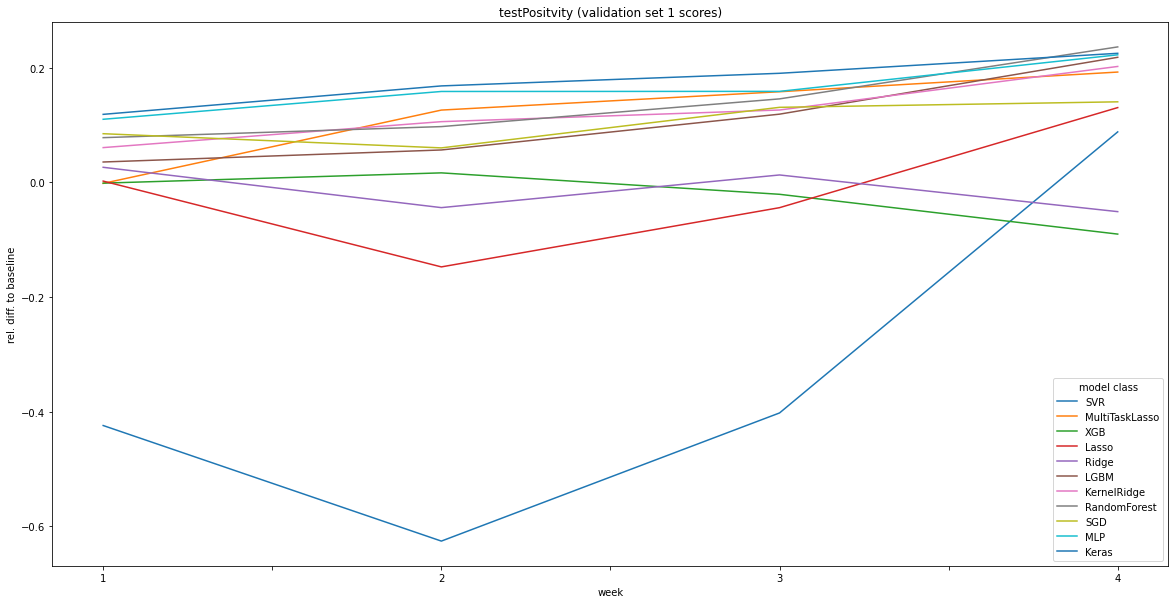

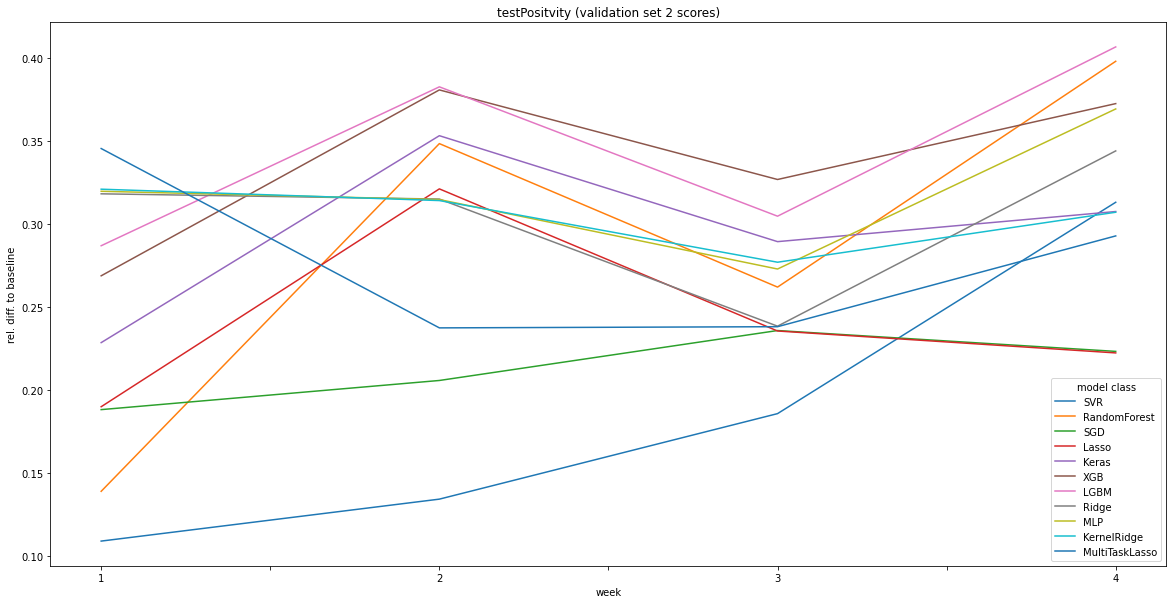

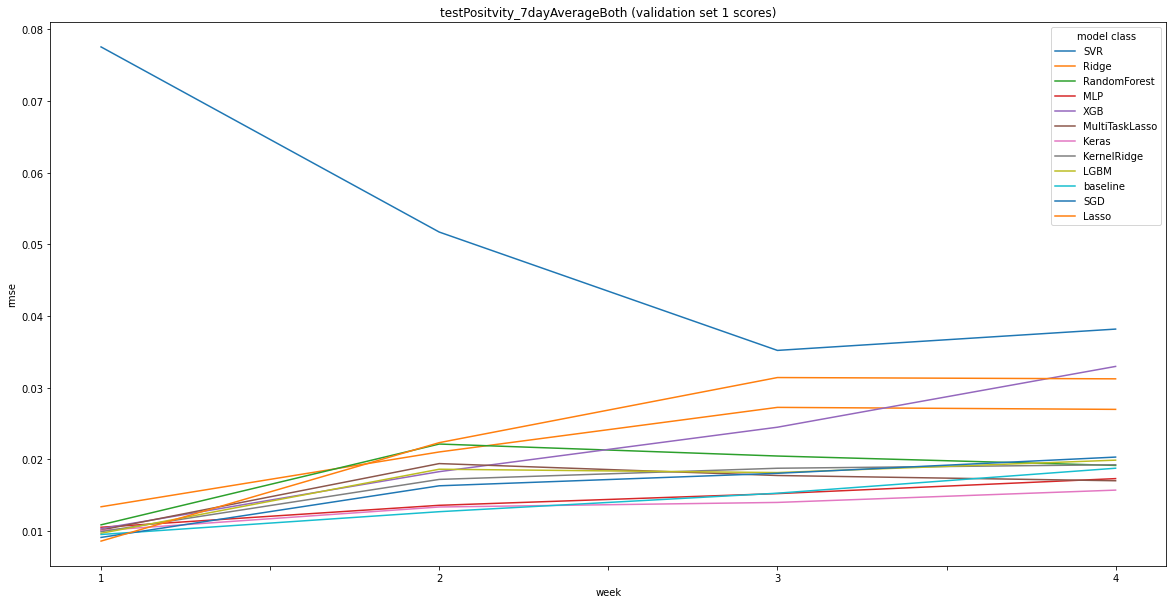

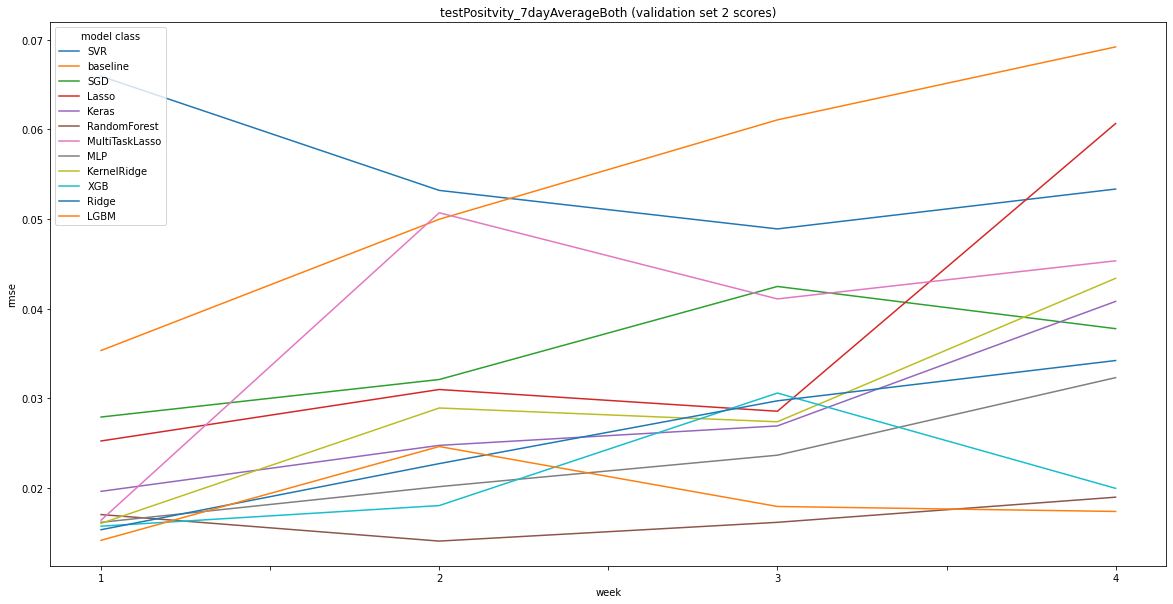

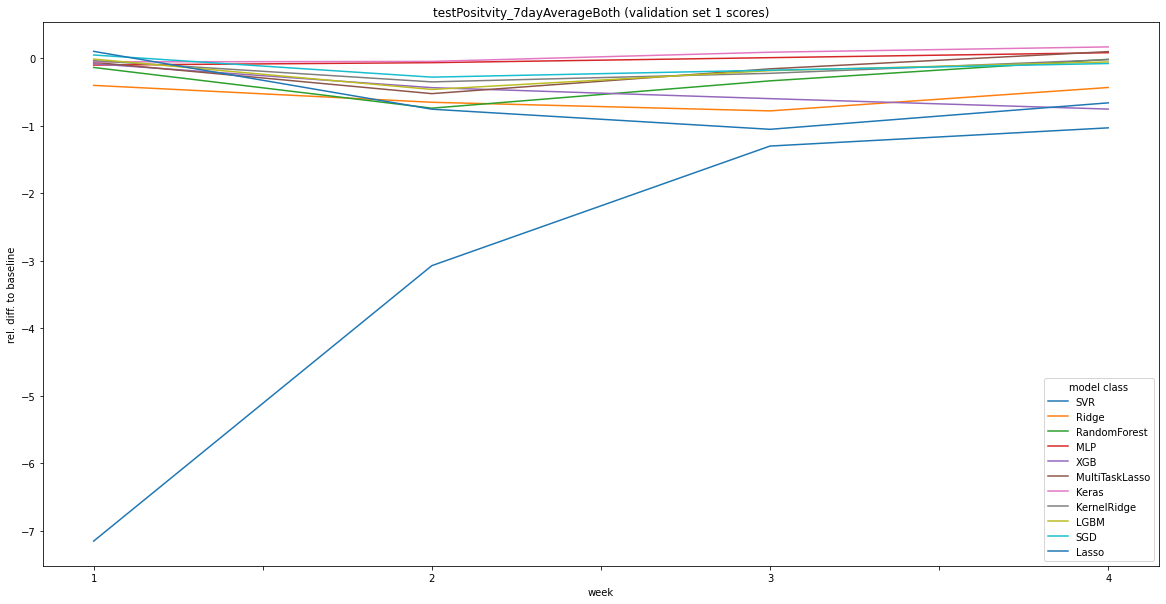

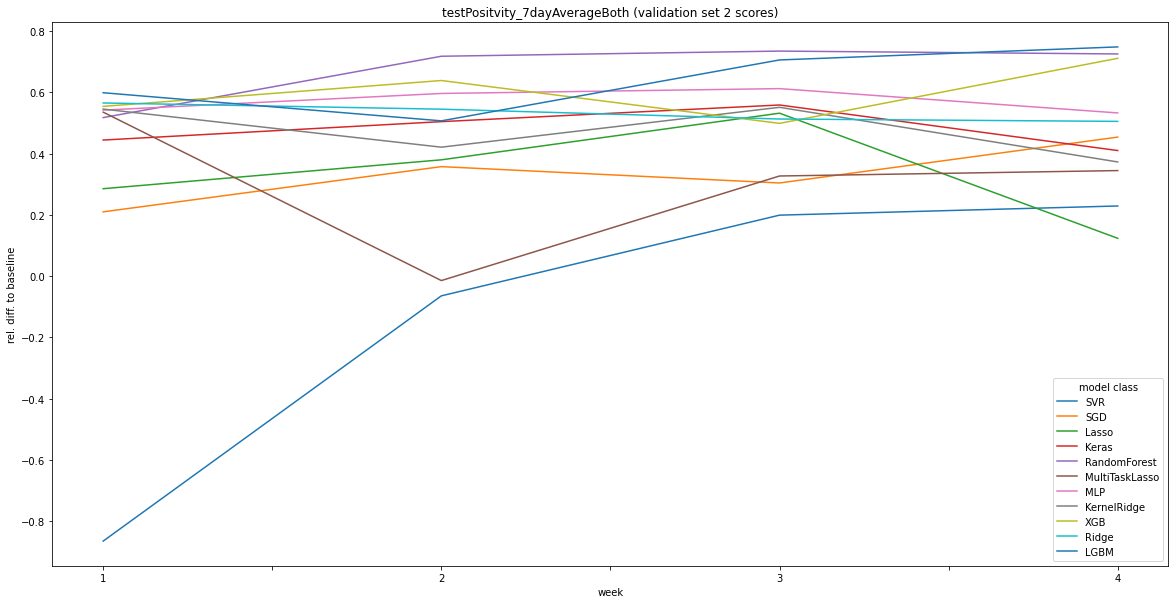

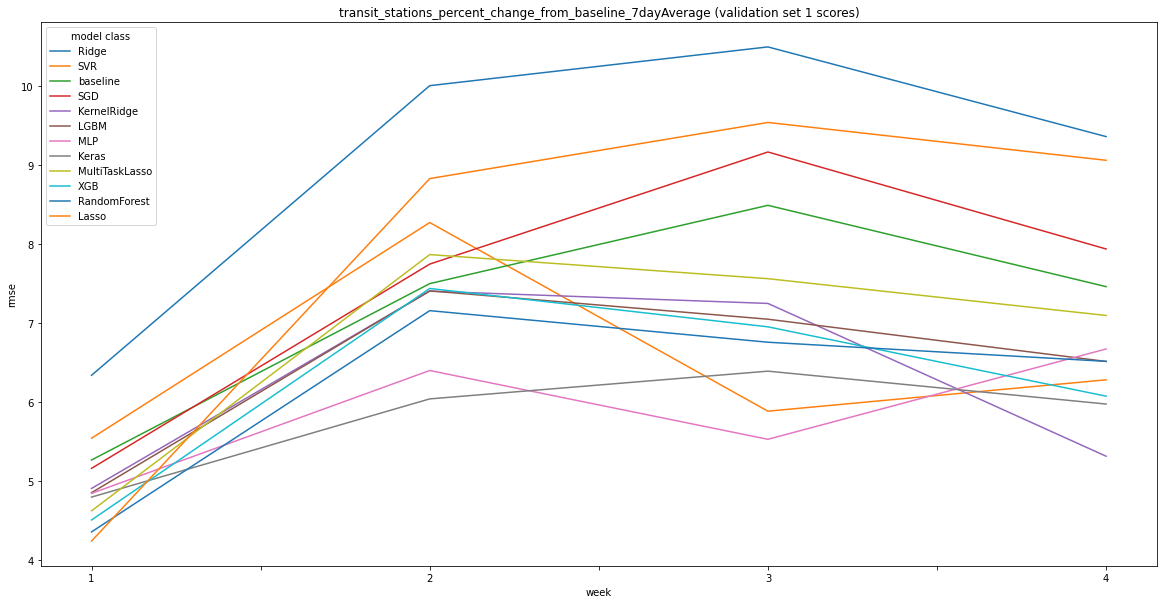

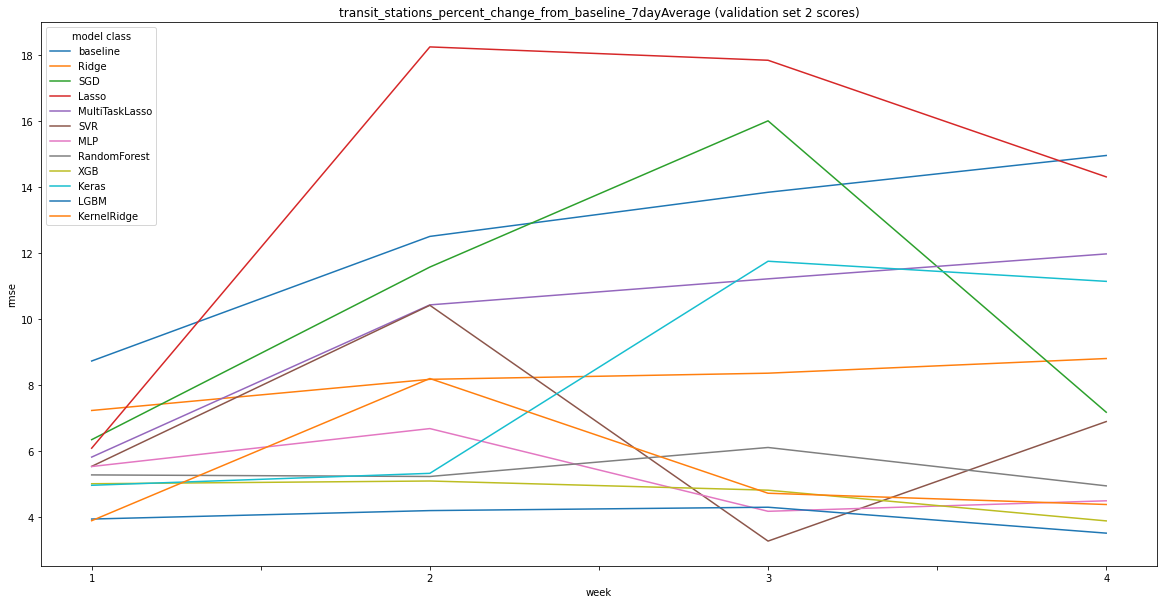

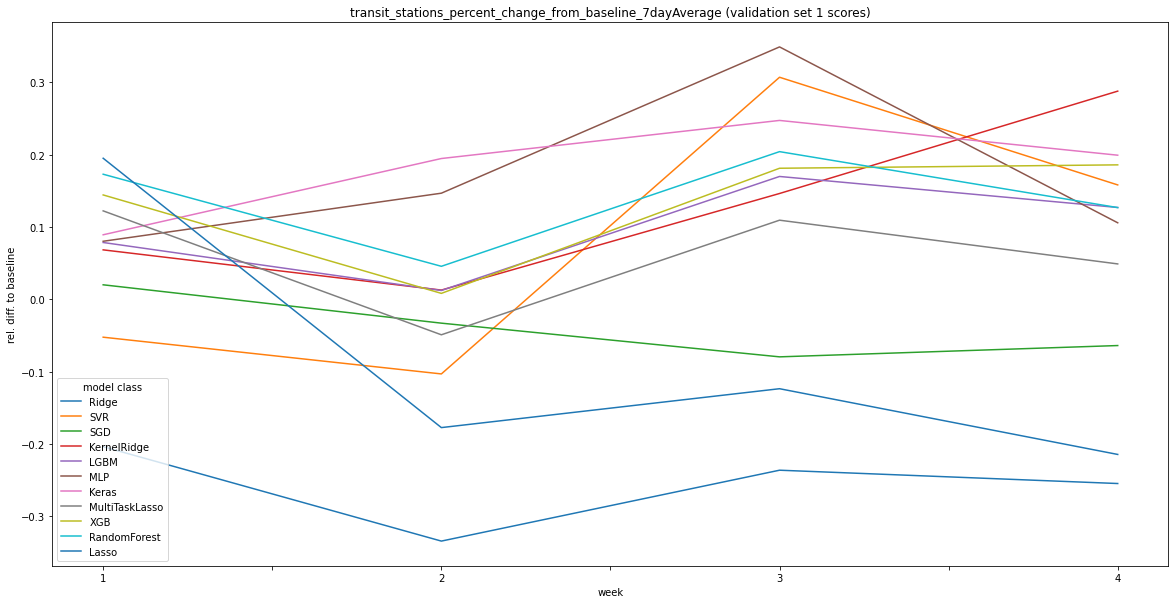

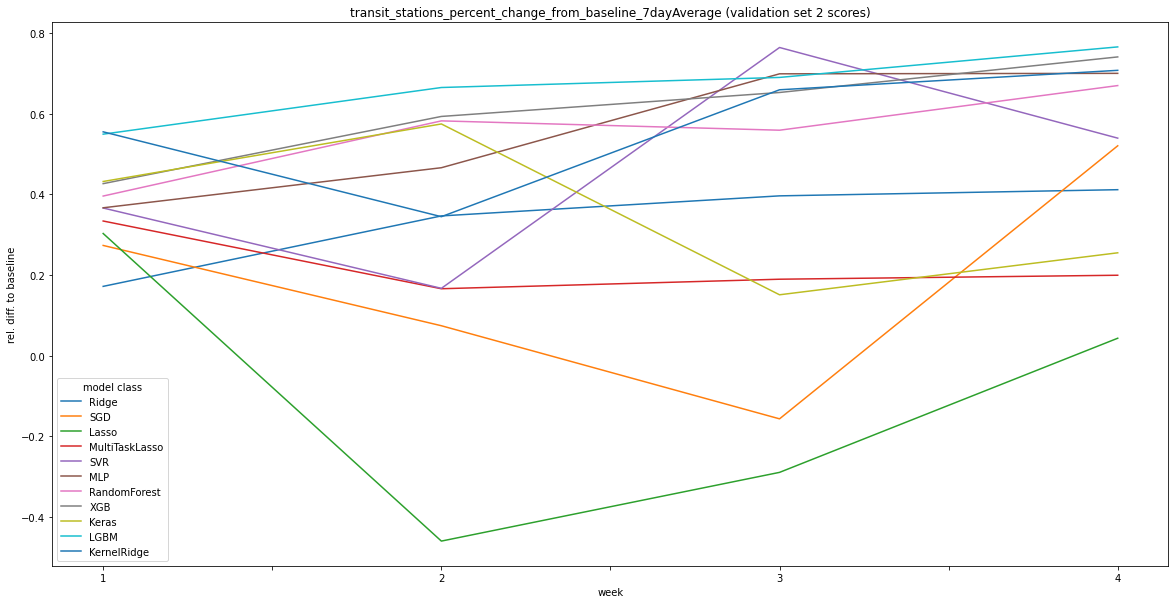

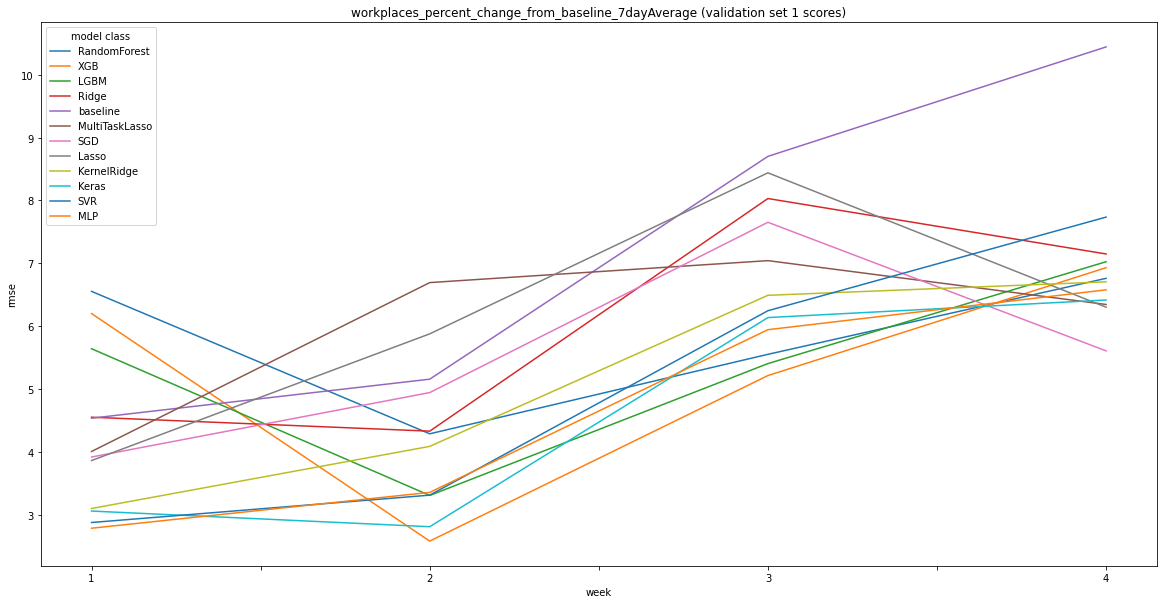

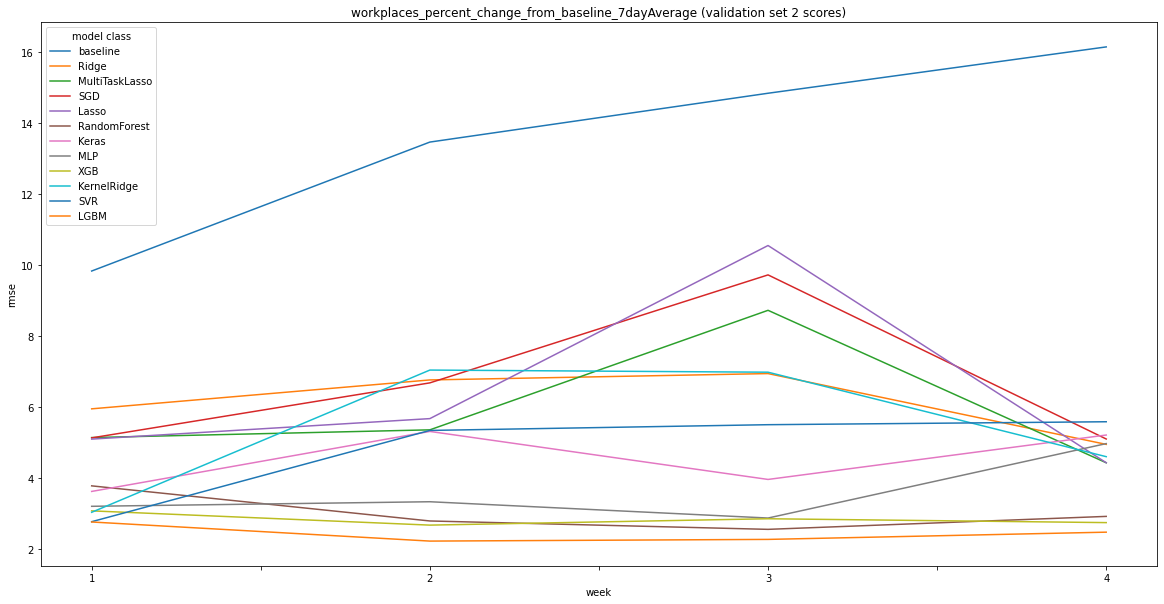

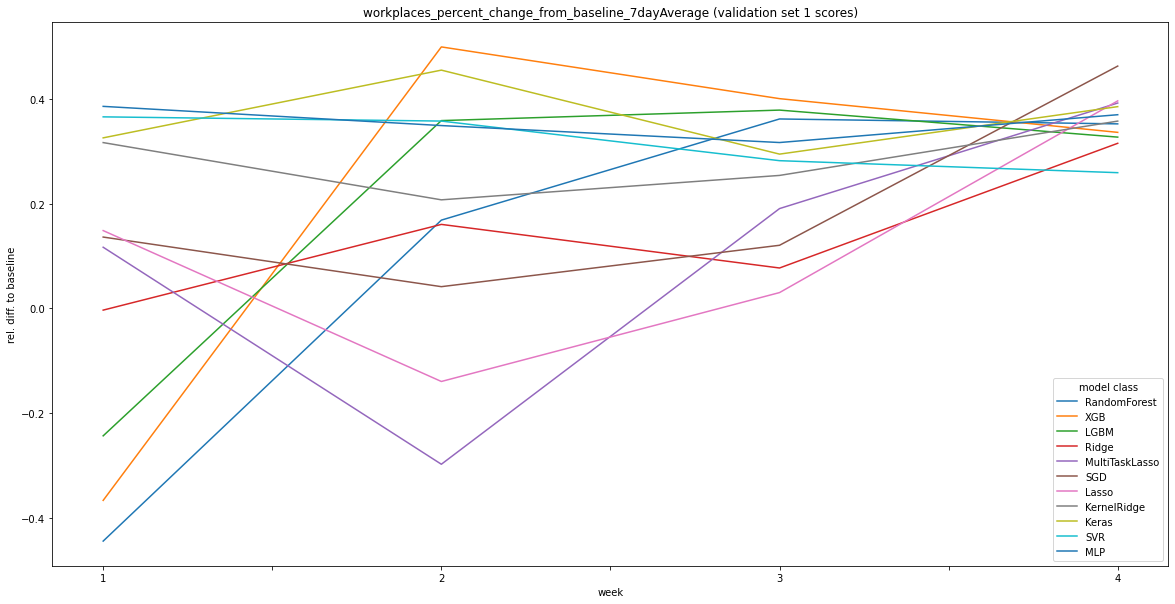

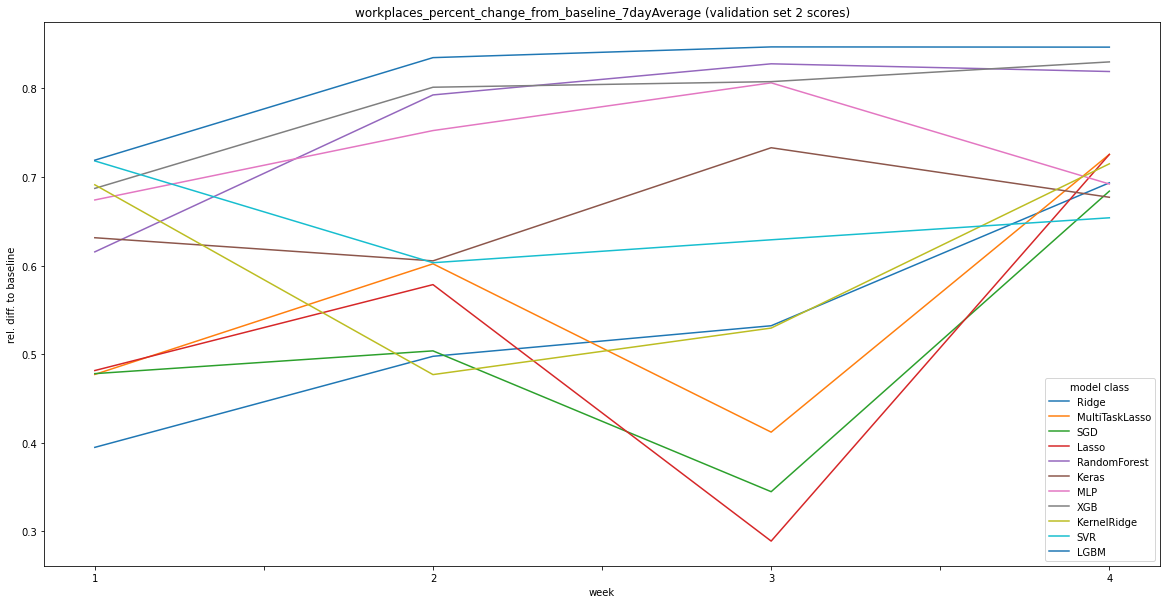

In [64]:
# MODEL COMPARISON (for all weeks and for all target best estimator per model class)
pd.options.display.max_rows = 11
for category in outputCategories:
    mergedAbs1 = pd.DataFrame()
    mergedAbs2 = pd.DataFrame()
    mergedRel1 = pd.DataFrame()
    mergedRel2 = pd.DataFrame()
    for week in range(0,numberOfOutputWeeks):
        temp = df[(df['week']==week)&(df['target']==category)].groupby(['model class']).apply(lambda x: x.sort_values(["rel. diff. to last value baseline 1"], ascending=False)).reset_index(drop=True)
        temp = temp.groupby(['model class']).head(1) #.sort_values(['rel. diff. to last value baseline 1'], ascending=False)
        
        # for absolut values plot
        temp1V1 = temp[['model class','model rsme 1','last value baseline rsme 1']].set_index('model class')
        temp1V2 = temp[['model class','model rsme 2','last value baseline rsme 2']].set_index('model class') 
        new_row1 = pd.Series(data={'rsme':temp1V1['last value baseline rsme 1'].values[0]}, name='baseline')
        new_row2 = pd.Series(data={'rsme':temp1V2['last value baseline rsme 2'].values[0]}, name='baseline')
        temp1V1.rename(columns = {'model rsme 1':'rsme'}, inplace = True)
        temp1V2.rename(columns = {'model rsme 2':'rsme'}, inplace = True)
        temp1V1.drop(['last value baseline rsme 1'], inplace=True, axis=1)
        temp1V2.drop(['last value baseline rsme 2'], inplace=True, axis=1)
        temp1V1 = temp1V1.append(new_row1, ignore_index=False).sort_values(['rsme'], ascending=False)
        temp1V2 = temp1V2.append(new_row2, ignore_index=False).sort_values(['rsme'], ascending=False)
        temp1V1.rename(columns = {'rsme':str(week+1)}, inplace=True)
        temp1V2.rename(columns = {'rsme':str(week+1)}, inplace=True)
        mergedAbs1 = mergedAbs1.append(temp1V1.transpose())
        mergedAbs2 = mergedAbs2.append(temp1V2.transpose())

        # for relative to baseline plot
        temp2V1 = temp[['model class','rel. diff. to last value baseline 1']].set_index('model class')
        temp2V2 = temp[['model class','rel. diff. to last value baseline 2']].set_index('model class')
        temp2V1.rename(columns = {'rel. diff. to last value baseline 1':'rel. diff. to baseline'}, inplace = True)
        temp2V2.rename(columns = {'rel. diff. to last value baseline 2':'rel. diff. to baseline'}, inplace = True)
        temp2V1 = temp2V1.sort_values(['rel. diff. to baseline'], ascending=True)
        temp2V2 = temp2V2.sort_values(['rel. diff. to baseline'], ascending=True)
        temp2V1.rename(columns = {'rel. diff. to baseline':str(week+1)}, inplace=True)
        temp2V2.rename(columns = {'rel. diff. to baseline':str(week+1)}, inplace=True)
        mergedRel1 = mergedRel1.append(temp2V1.transpose())
        mergedRel2 = mergedRel2.append(temp2V2.transpose())

    mergedAbs1.plot(kind='line',title=category + " (validation set 1 scores)",ylabel='rmse', xlabel="week", figsize=(20,10))
    mergedAbs2.plot(kind='line',title=category + " (validation set 2 scores)",ylabel='rmse', xlabel="week", figsize=(20,10))
    mergedRel1.plot(kind='line',title=category + " (validation set 1 scores)",ylabel='rel. diff. to baseline', xlabel="week", figsize=(20,10))
    mergedRel2.plot(kind='line',title=category + " (validation set 2 scores)",ylabel='rel. diff. to baseline', xlabel="week", figsize=(20,10))
    plt.show()    
        
    

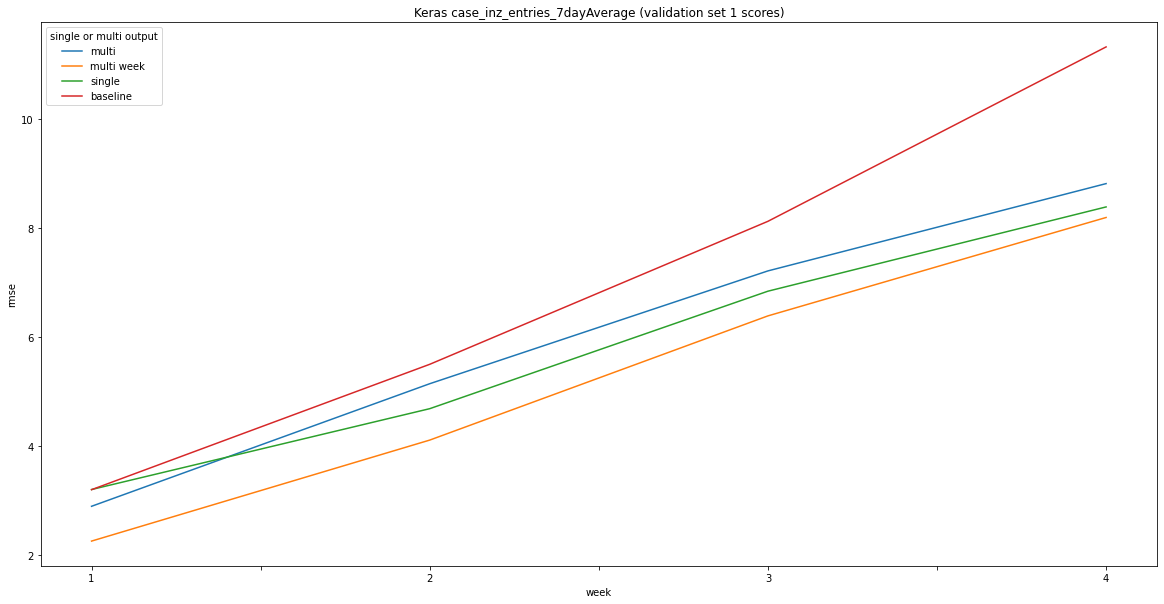

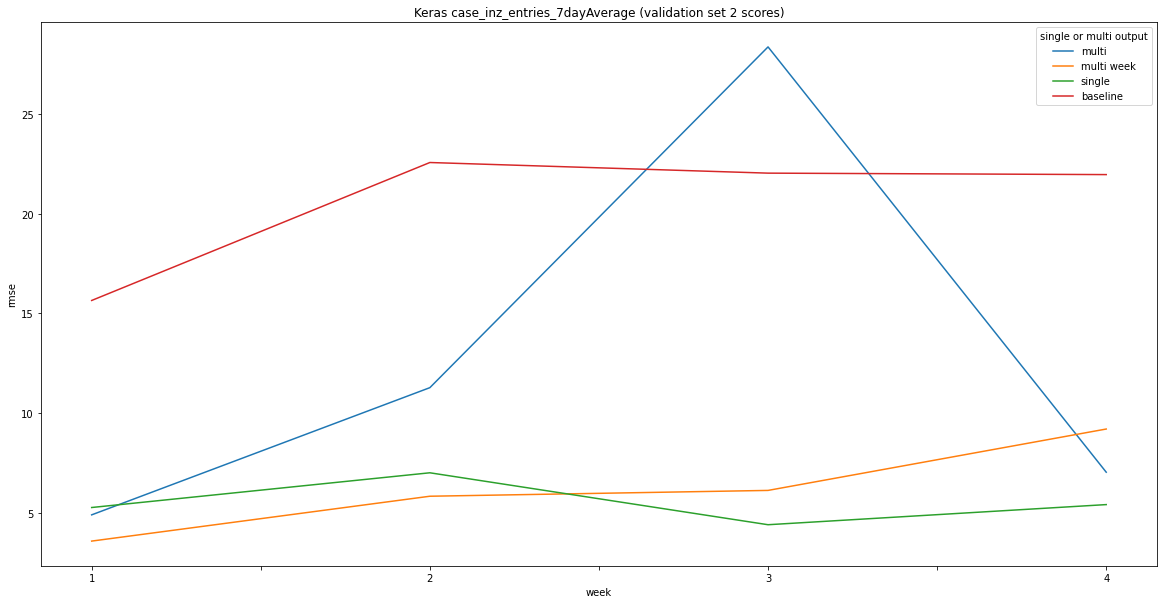

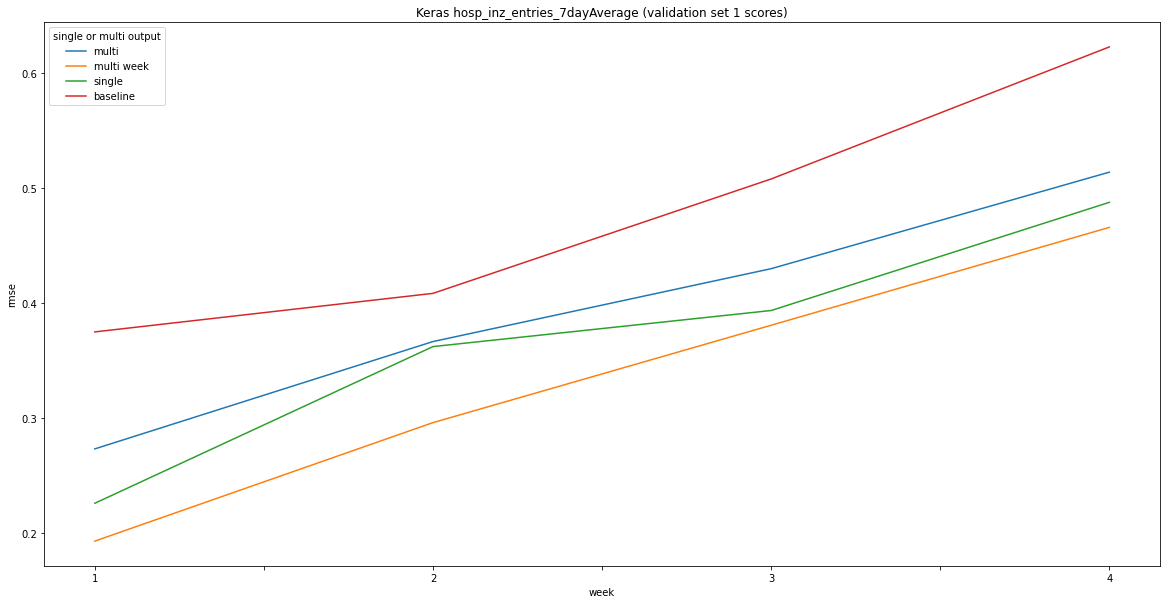

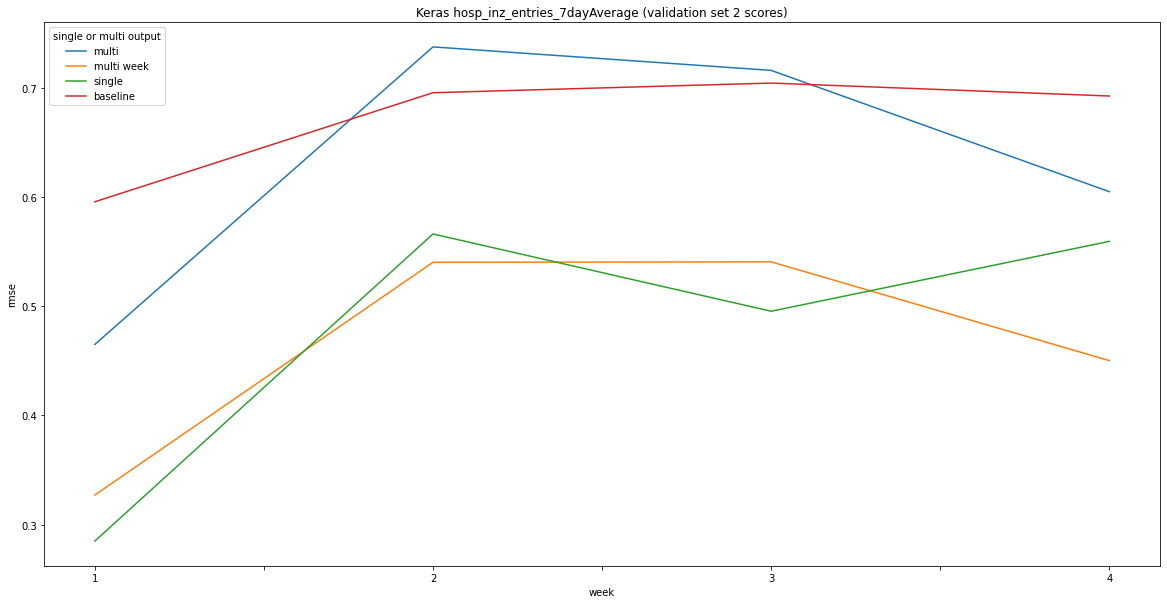

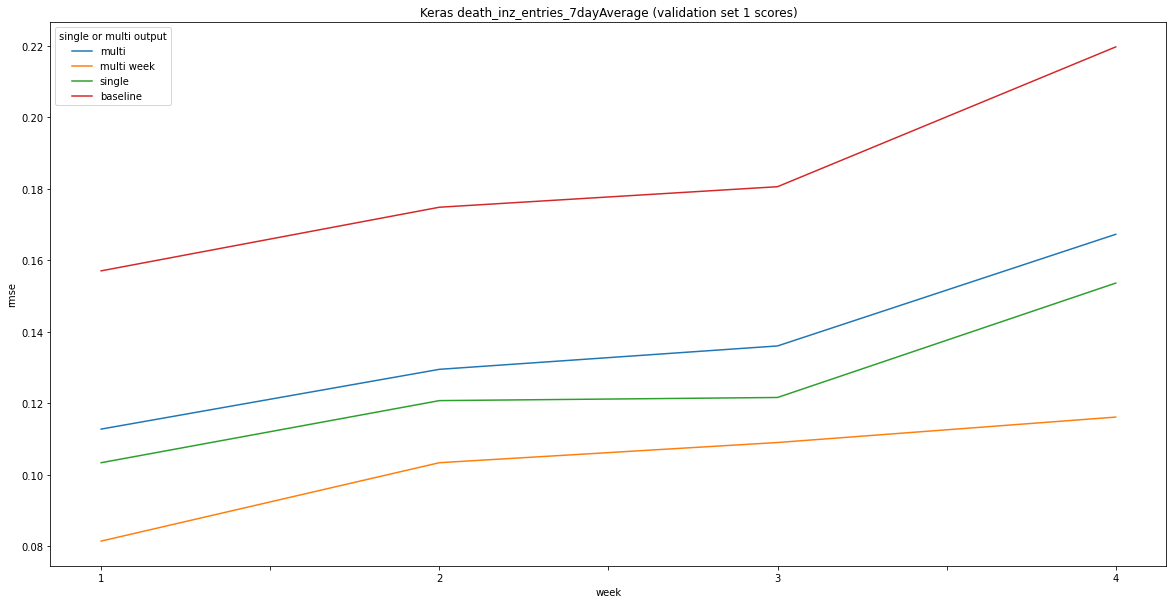

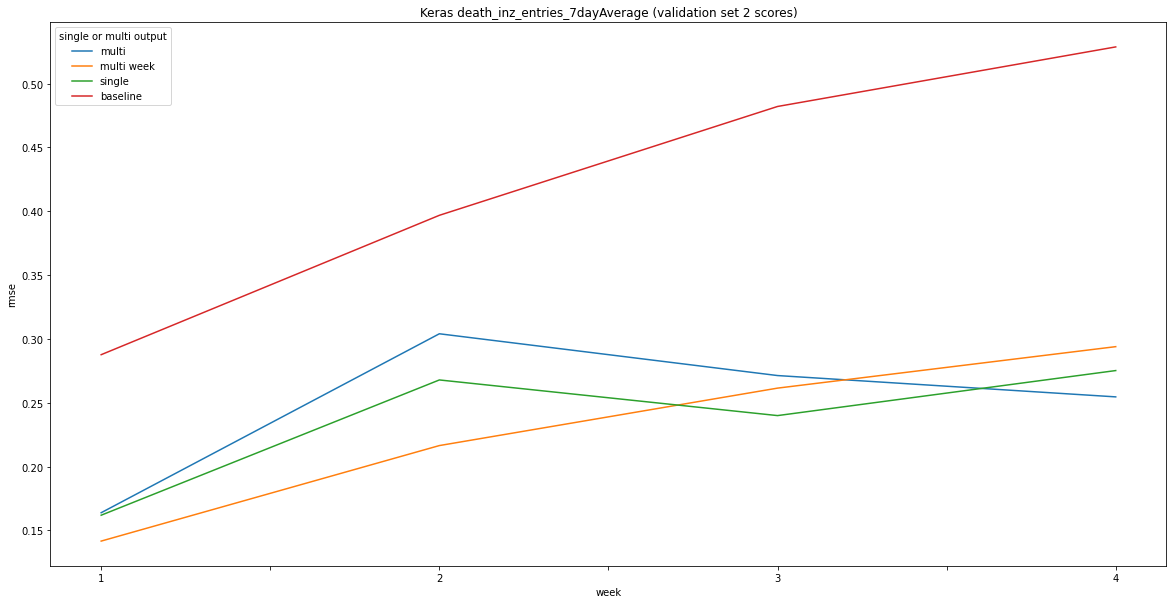

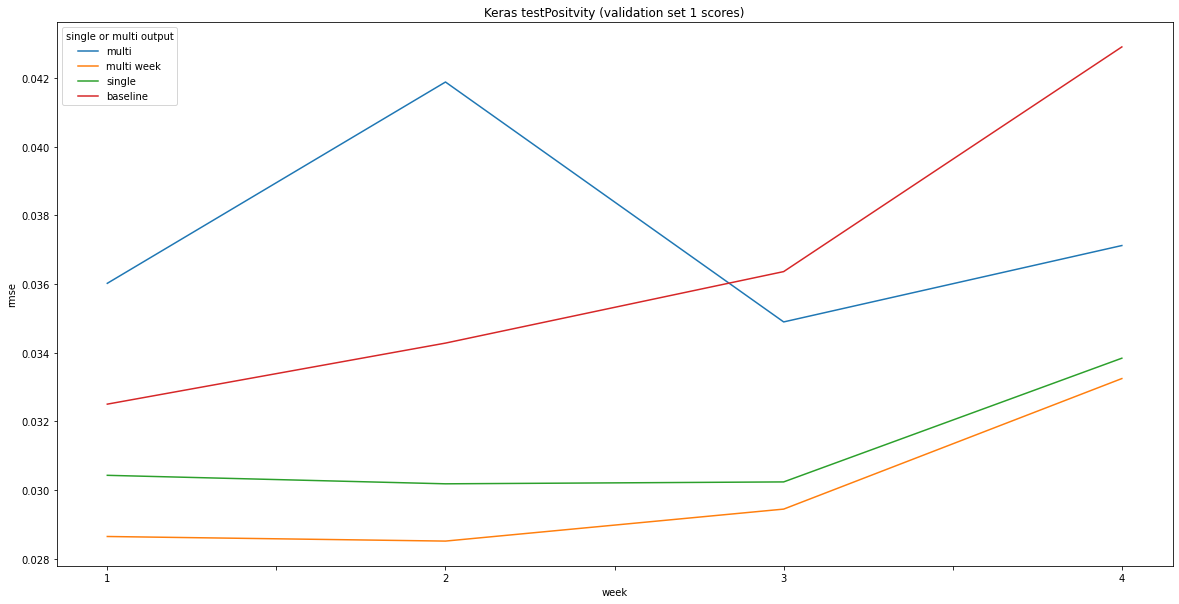

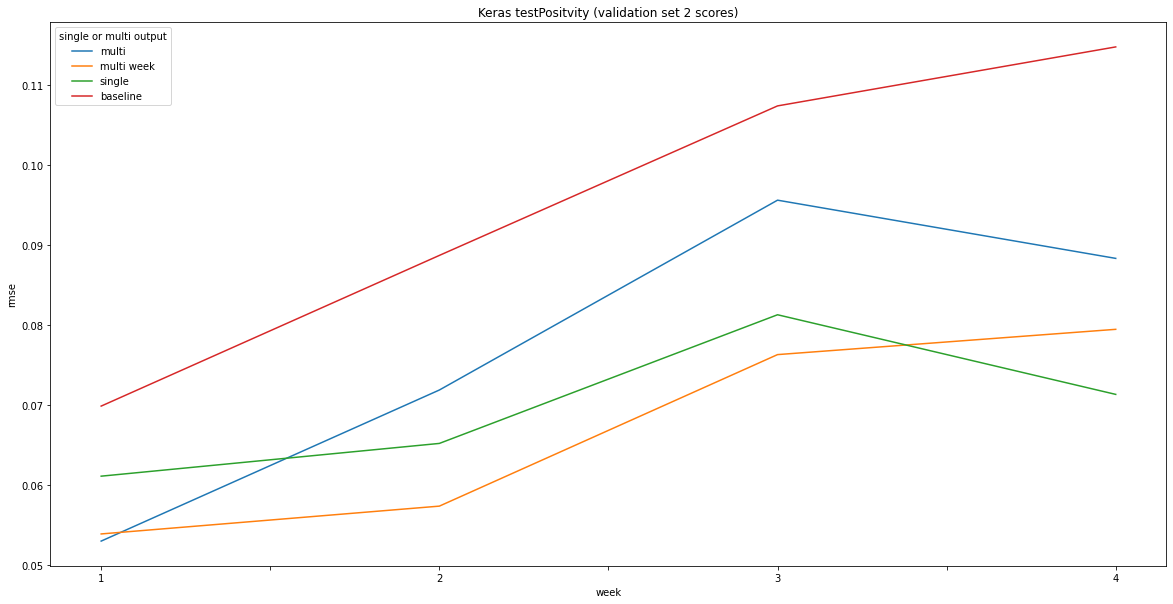

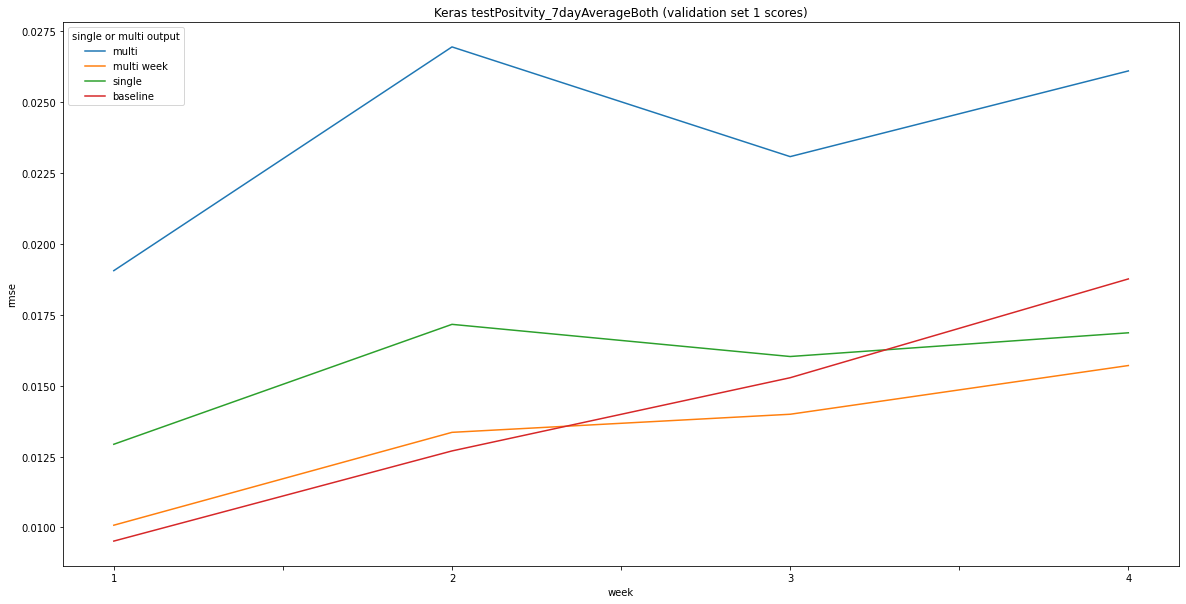

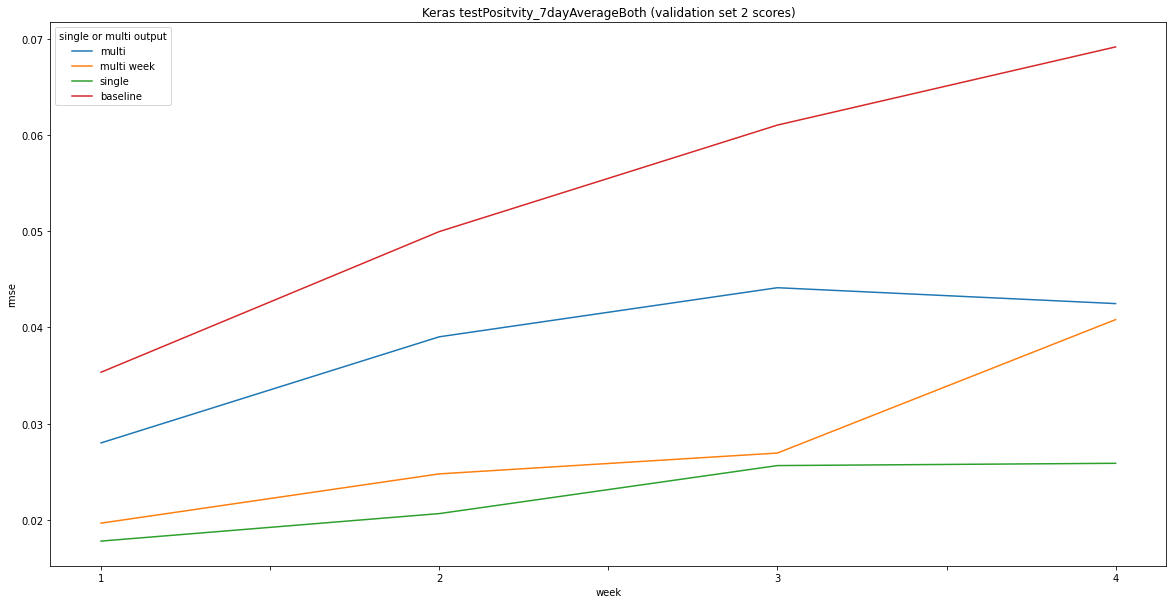

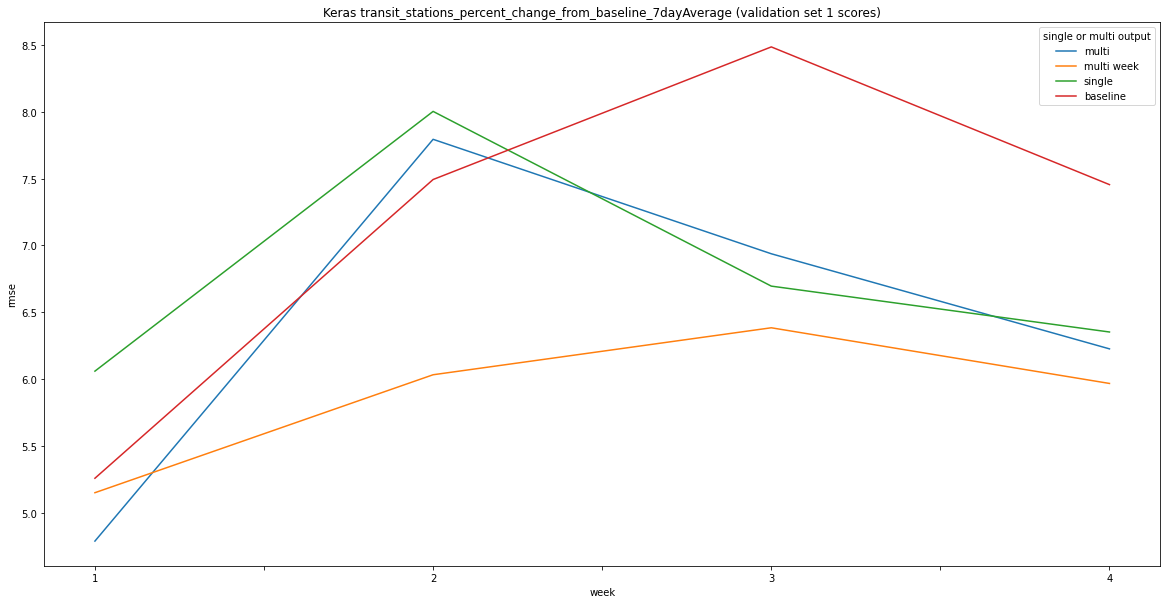

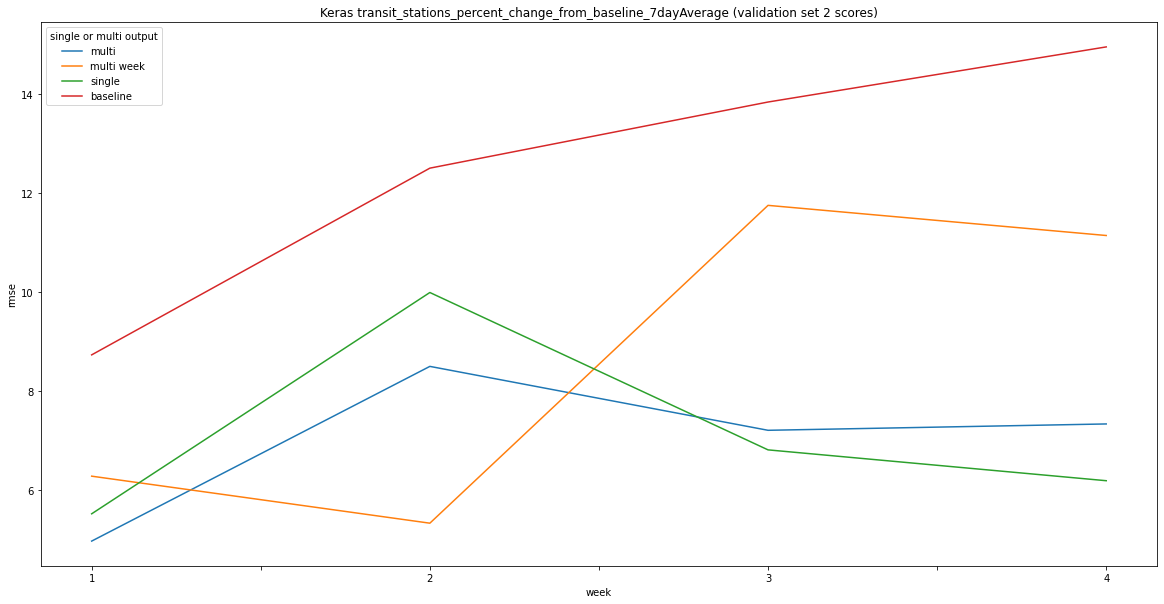

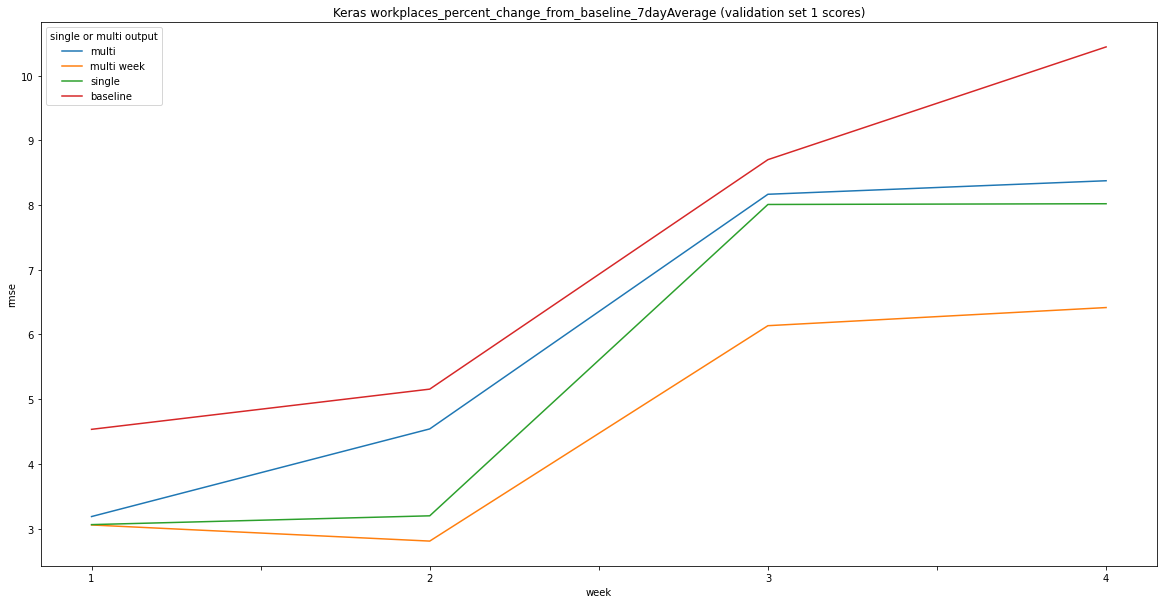

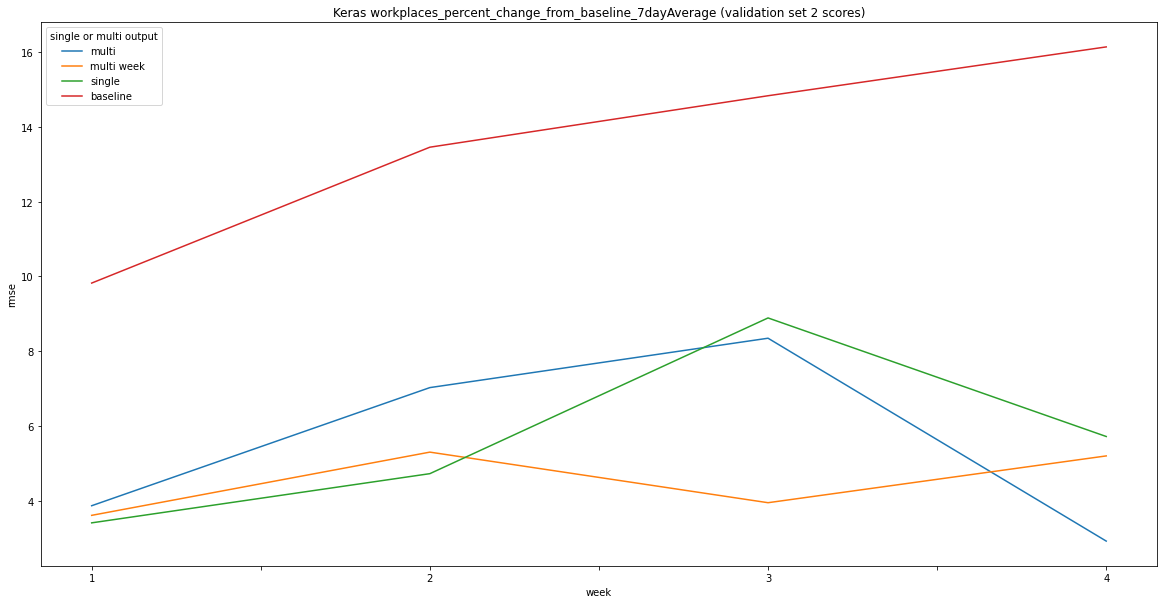

In [69]:
# SINGLE VS. MULTI OUTPUT (for all weeks and for all targets plot single, multi, baseline per model class)
for modelClass in ['Keras']: # 'RandomForest', 'Lasso''Keras' ,'SGD','KernelRidge','MultiTaskLasso','MLP','KernelRidge','XGB','LGBM','Ridge','SVR','Keras'
    for category in outputCategories:
        merged1 = pd.DataFrame()
        merged2 = pd.DataFrame()
        for week in range(0,numberOfOutputWeeks):
            temp = df[(df['week']==week)&(df['target']==category)&(df['model class']==modelClass)].groupby(['single or multi output']).apply(lambda x: x.sort_values(["rel. diff. to last value baseline 1"], ascending=False)).reset_index(drop=True)
            temp = temp.groupby(['single or multi output']).head(1)
            temp1 = temp[['model rsme 1', 'last value baseline rsme 1', 'single or multi output']].set_index('single or multi output')
            temp2 = temp[['model rsme 2', 'last value baseline rsme 2', 'single or multi output']].set_index('single or multi output')
            new_row1 = pd.Series(data={'rsme':temp1['last value baseline rsme 1'].values[0]}, name='baseline')
            new_row2 = pd.Series(data={'rsme':temp2['last value baseline rsme 2'].values[0]}, name='baseline')
            temp1.rename(columns = {'model rsme 1':'rsme'}, inplace = True)
            temp2.rename(columns = {'model rsme 2':'rsme'}, inplace = True)
            temp1.drop(['last value baseline rsme 1'], inplace=True, axis=1)
            temp2.drop(['last value baseline rsme 2'], inplace=True, axis=1)
            temp1 = temp1.append(new_row1, ignore_index=False) #.sort_values(['rsme'], ascending=False)
            temp2 = temp2.append(new_row2, ignore_index=False)
            temp1.rename(columns = {'rsme':str(week+1)}, inplace=True)
            temp2.rename(columns = {'rsme':str(week+1)}, inplace=True)
            merged1 = merged1.append(temp1.transpose())
            merged2 = merged2.append(temp2.transpose())
            #temp.plot(kind='bar', title=modelClass+"_"+category+"_"+"week_"+str(week))
            #plt.show()
        merged1.plot(kind='line',title=modelClass+" "+category +" (validation set 1 scores)",ylabel='rmse', xlabel="week", figsize=(20,10))
        merged2.plot(kind='line',title=modelClass+" "+category +" (validation set 2 scores)",ylabel='rmse', xlabel="week", figsize=(20,10))
    

In [7]:
# inspect a regressor
identifier = 3504

import sys

sys.stdout.write(results.loc[[identifier]]['model'].values[0])

MLPRegressor(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=100, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)